# Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
eda_df = pd.read_csv("C:/Research/Msc/CMM709/CAUSALITY-EXPLORE/data/interim/medical_appointment_no_show_cleaned.csv").iloc[:, 1:]
eda_df

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,False,False
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,False,False
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,False,False
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,False,False
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,True,False
110523,3596266328735,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,True,False
110524,15576631729893,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,True,False
110525,92134931435557,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,True,False


In [3]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   patient_id       110527 non-null  int64 
 1   appointment_id   110527 non-null  int64 
 2   gender           110527 non-null  object
 3   scheduled_day    110527 non-null  object
 4   appointment_day  110527 non-null  object
 5   age              110527 non-null  int64 
 6   neighbourhood    110527 non-null  object
 7   scholarship      110527 non-null  int64 
 8   hypertension     110527 non-null  int64 
 9   diabetes         110527 non-null  int64 
 10  alcoholism       110527 non-null  int64 
 11  handicap         110527 non-null  int64 
 12  sms_received     110527 non-null  bool  
 13  no_show          110527 non-null  bool  
dtypes: bool(2), int64(8), object(4)
memory usage: 10.3+ MB


In [4]:
# Convert label data types
eda_df['patient_id'] = eda_df['patient_id'].astype('int64')

# Convert `gender`, `neighbourhood`, `handicap`, to categorical type
for col in ['gender', 'neighbourhood']:
    eda_df[col] = eda_df[col].astype('category')
    
# Convert `scheduled_day` and `appointment_day` to datetime
for col in ['scheduled_day', 'appointment_day']:
    eda_df[col] = pd.to_datetime(eda_df[col]).dt.date.astype('datetime64[ns]')

eda_df

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,False,False
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,False,False
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,False,False
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,False,False
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,True,False
110523,3596266328735,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,True,False
110524,15576631729893,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,True,False
110525,92134931435557,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,True,False


In [5]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  int64         
 1   appointment_id   110527 non-null  int64         
 2   gender           110527 non-null  category      
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighbourhood    110527 non-null  category      
 7   scholarship      110527 non-null  int64         
 8   hypertension     110527 non-null  int64         
 9   diabetes         110527 non-null  int64         
 10  alcoholism       110527 non-null  int64         
 11  handicap         110527 non-null  int64         
 12  sms_received     110527 non-null  bool          
 13  no_show          110527 non-null  bool          
dtypes: bool(2), category

<p>Let's explore the details of individual patient characteristics and of our dependent variable: <i>No Show</i></p>

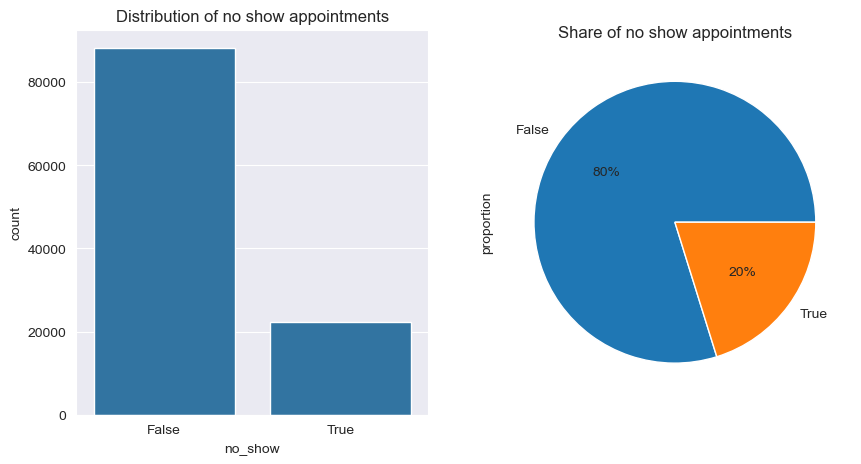

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=eda_df, x=eda_df.no_show)
plt.title('Distribution of no show appointments')

plt.subplot(1,2,2)
eda_df.no_show.value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%')
plt.title('Share of no show appointments')
plt.show()

In [7]:
# Distribution of no_shows in the dataset
print("Distribution of",eda_df.groupby('no_show').count()['age'])

Distribution of no_show
False    88208
True     22319
Name: age, dtype: int64


In [8]:
txt = "There are 22,319 in the data set, which make {percentage:.2f}% of all appointments."
print(txt.format(percentage=eda_df['no_show'].sum() / len(eda_df.index) * 100))

There are 22,319 in the data set, which make 20.19% of all appointments.


<p>The highest correlation is for <i>hypertension</i> and <i>age</i>, <i>hypertension</i> and <i>diabetes</i>, and diabetes and age</p>

In [9]:
temp_df = eda_df.copy(deep=True)
print(temp_df.dtypes.equals(eda_df.dtypes))

True


In [10]:
temp_df = temp_df.drop(['gender', 'scheduled_day', 'appointment_day', 'neighbourhood'], axis=1)

In [11]:
temp_df.corr().style.background_gradient(cmap='Blues')

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
patient_id,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749,-0.001461
appointment_id,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618,-0.162602
age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292392,0.095811,0.078033,0.012643,-0.060319
scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,0.029135
hypertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,-0.035701
diabetes,0.001605,0.022628,0.292392,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,-0.015180
alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,-0.000196
handicap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,-0.006076
sms_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,0.126431
no_show,-0.001461,-0.162602,-0.060319,0.029135,-0.035701,-0.015180,-0.000196,-0.006076,0.126431,1.000000


<h3>i. Age Analysis</h4>

<div>
    <h4>a. Correlation Between Age & Hypertension</h4>
</div>

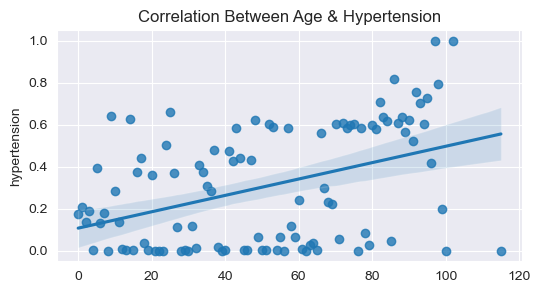

In [12]:
hypertension_mean_value = eda_df['hypertension'].groupby(eda_df['age']).mean()
ages = eda_df['age'].unique()

plt.figure(figsize=(6,3))
sns.regplot(x = ages, y = hypertension_mean_value)
plt.title('Correlation Between Age & Hypertension')
plt.show()

<p>Hypertension is common among older people. so we explore older patients for correlation between 'Age' and 'Hypertension'</p>

<div> <h4>b. Correlation Between Age & Diabetes</h4></div>

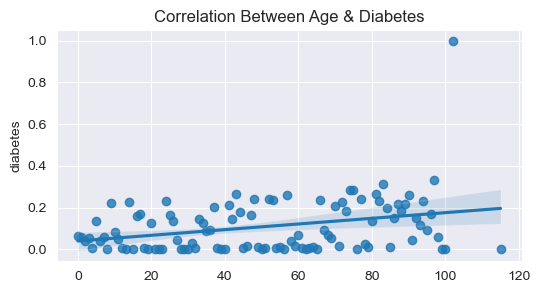

In [13]:
diabetes_mean_value = eda_df['diabetes'].groupby(eda_df['age']).mean()
unique_age_value = eda_df['age'].unique()

plt.figure(figsize=(6,3))
sns.regplot(x = unique_age_value, y = diabetes_mean_value)
plt.title("Correlation Between Age & Diabetes")
plt.show()

<p>The outlier is caused by having only one appointment with a patient aged 99 years and this patient is diabetic</p>

In [14]:
eda_df.query('age >= 99').head(25)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
58014,976294799775439,5651757,F,2016-05-03,2016-05-03,102,CONQUISTA,0,0,0,0,0,False,False
63912,31963211613981,5700278,F,2016-05-16,2016-05-19,115,ANDORINHAS,0,0,0,0,1,False,True
63915,31963211613981,5700279,F,2016-05-16,2016-05-19,115,ANDORINHAS,0,0,0,0,1,False,True
68127,31963211613981,5562812,F,2016-04-08,2016-05-16,115,ANDORINHAS,0,0,0,0,1,False,True
76284,31963211613981,5744037,F,2016-05-30,2016-05-30,115,ANDORINHAS,0,0,0,0,1,False,False
79270,9739429797896,5747809,M,2016-05-30,2016-05-31,100,TABUAZEIRO,0,0,0,0,1,False,False
79272,9739429797896,5747808,M,2016-05-30,2016-05-31,100,TABUAZEIRO,0,0,0,0,1,False,False
90372,234283596548,5751563,F,2016-05-31,2016-06-02,102,MARIA ORTIZ,0,0,0,0,0,False,False
92084,55783129426615,5670914,F,2016-05-06,2016-06-03,100,ANTÔNIO HONÓRIO,0,0,0,0,0,True,False
97647,36615771819,5775674,F,2016-06-06,2016-06-06,99,SANTO ANTÔNIO,0,1,1,0,0,False,False


Repeating the above, but cutting out the one outlier appointment to see the correlation better

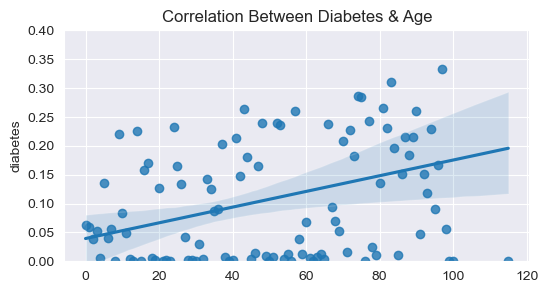

In [15]:
plt.figure(figsize=(6,3))
sns.regplot(x = unique_age_value, y = diabetes_mean_value)
plt.title("Correlation Between Diabetes & Age")
plt.ylim(0,0.4)
plt.show()

<h4>c. Age Distribution</h4>

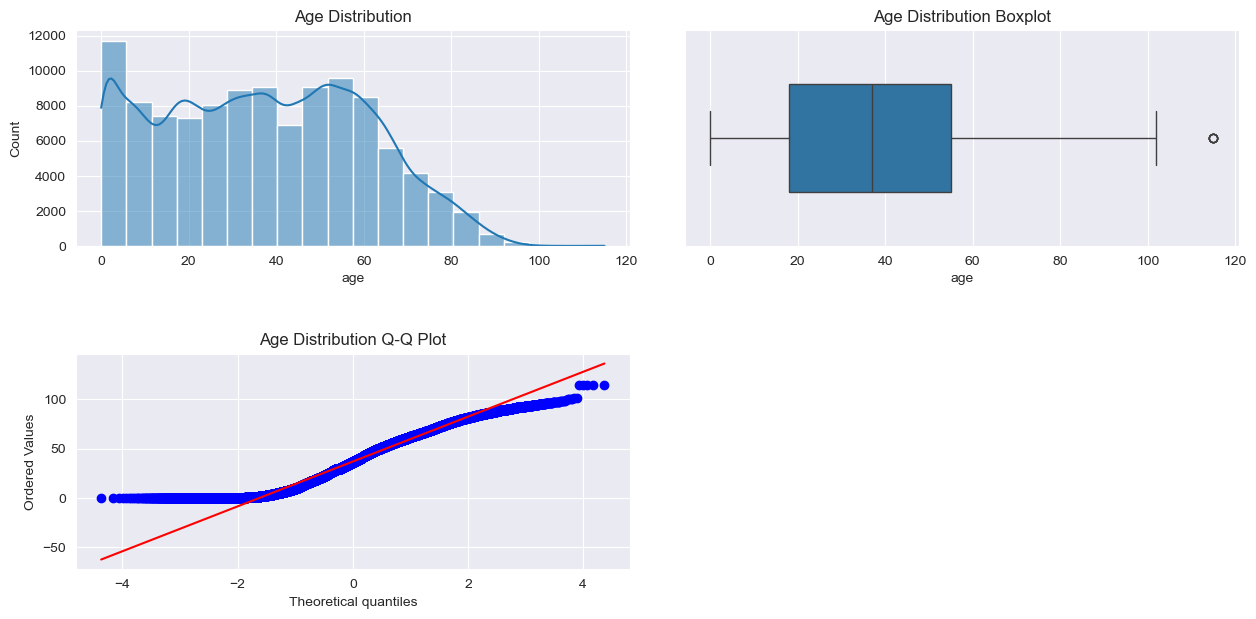

In [16]:
plt.figure(figsize=(15,7))

plt.subplot(2,2,1)
sns.histplot(data=eda_df, x='age', kde=True, bins=20)
plt.title("Age Distribution")

plt.subplot(2,2,2)
sns.boxplot(data=eda_df, x='age', orient='h', width=0.5)
plt.title("Age Distribution Boxplot")

plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.subplot(2,2,3)
stats.probplot(eda_df['age'], dist="norm", plot=plt)
plt.title("Age Distribution Q-Q Plot")
plt.show()


<div>
    <h4>d. Age Distribution by Scholarship</h4>
</div

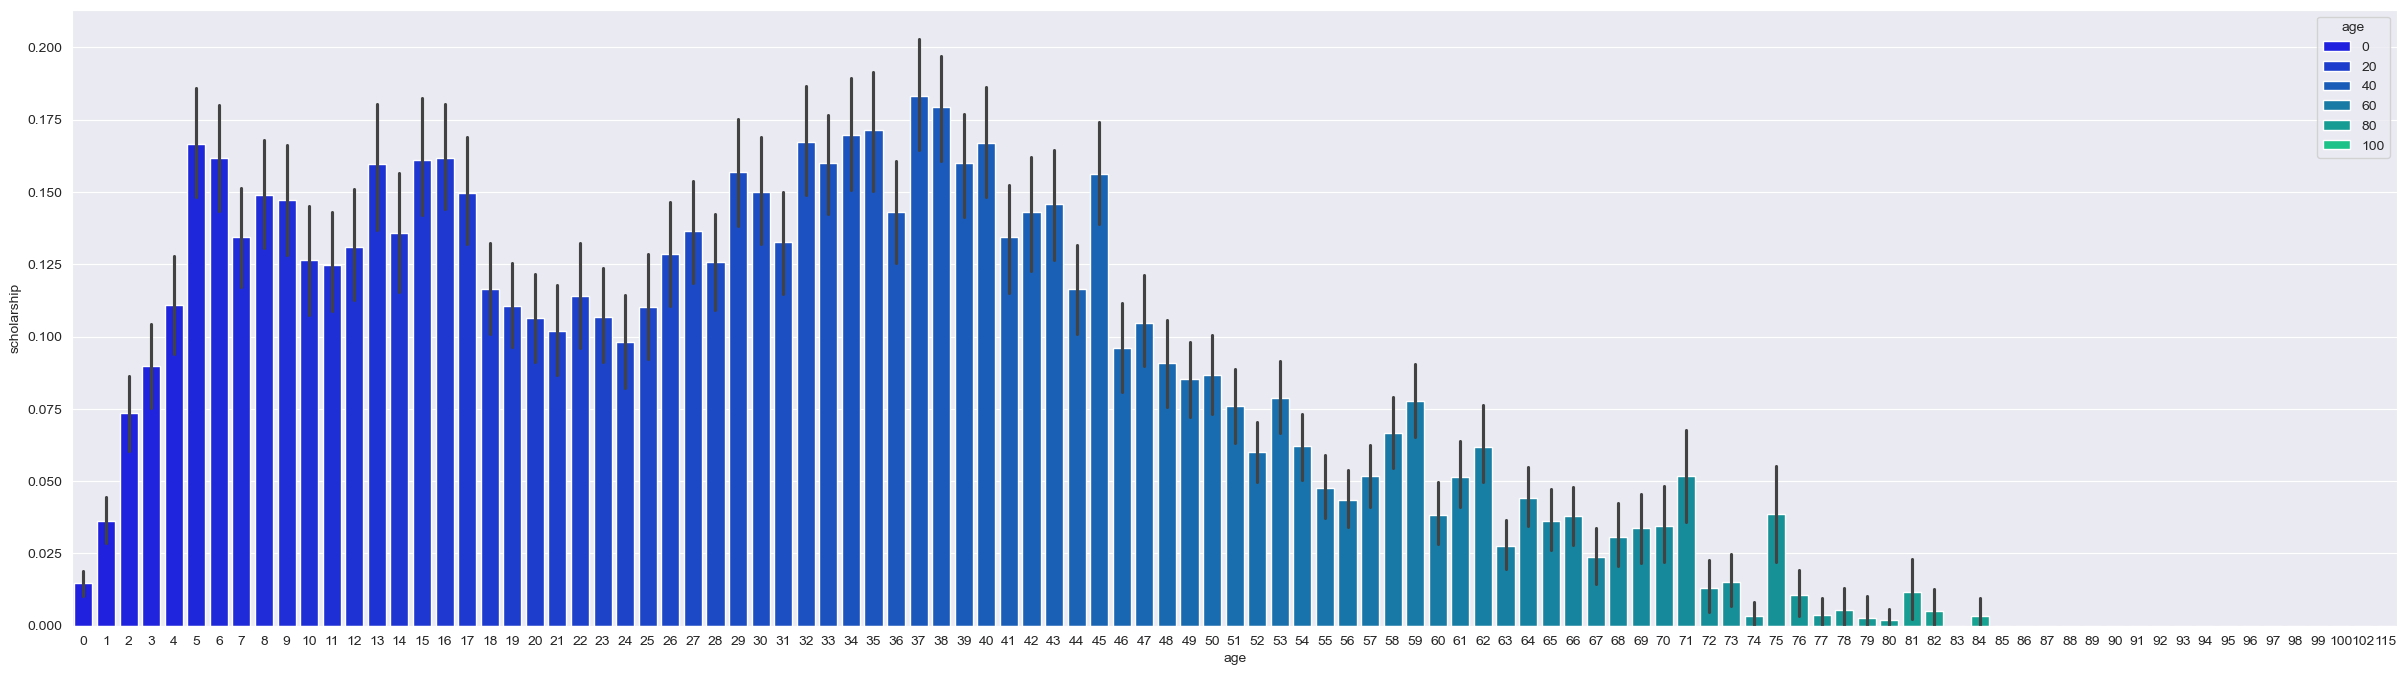

In [17]:
plt.figure(figsize=(30,8))
sns.barplot(data=eda_df, x='age', y='scholarship', hue='age', palette='winter')
sns.set_theme(style="whitegrid")
plt.show()

<p>
The bar plot shows the distribution of patients with and without a scholarship across different age groups. The majority of patients are not on a scholarship, with a slight increase in the number of patients on a scholarship in the age group of 0-10 years. The number of patients on a scholarship decreases as the age increases, with very few patients on a scholarship in the age group of 60-70 years and above.</p>
</p>

<div>
    <h4>e. Age Distribution by Scholarship</h4>
</div

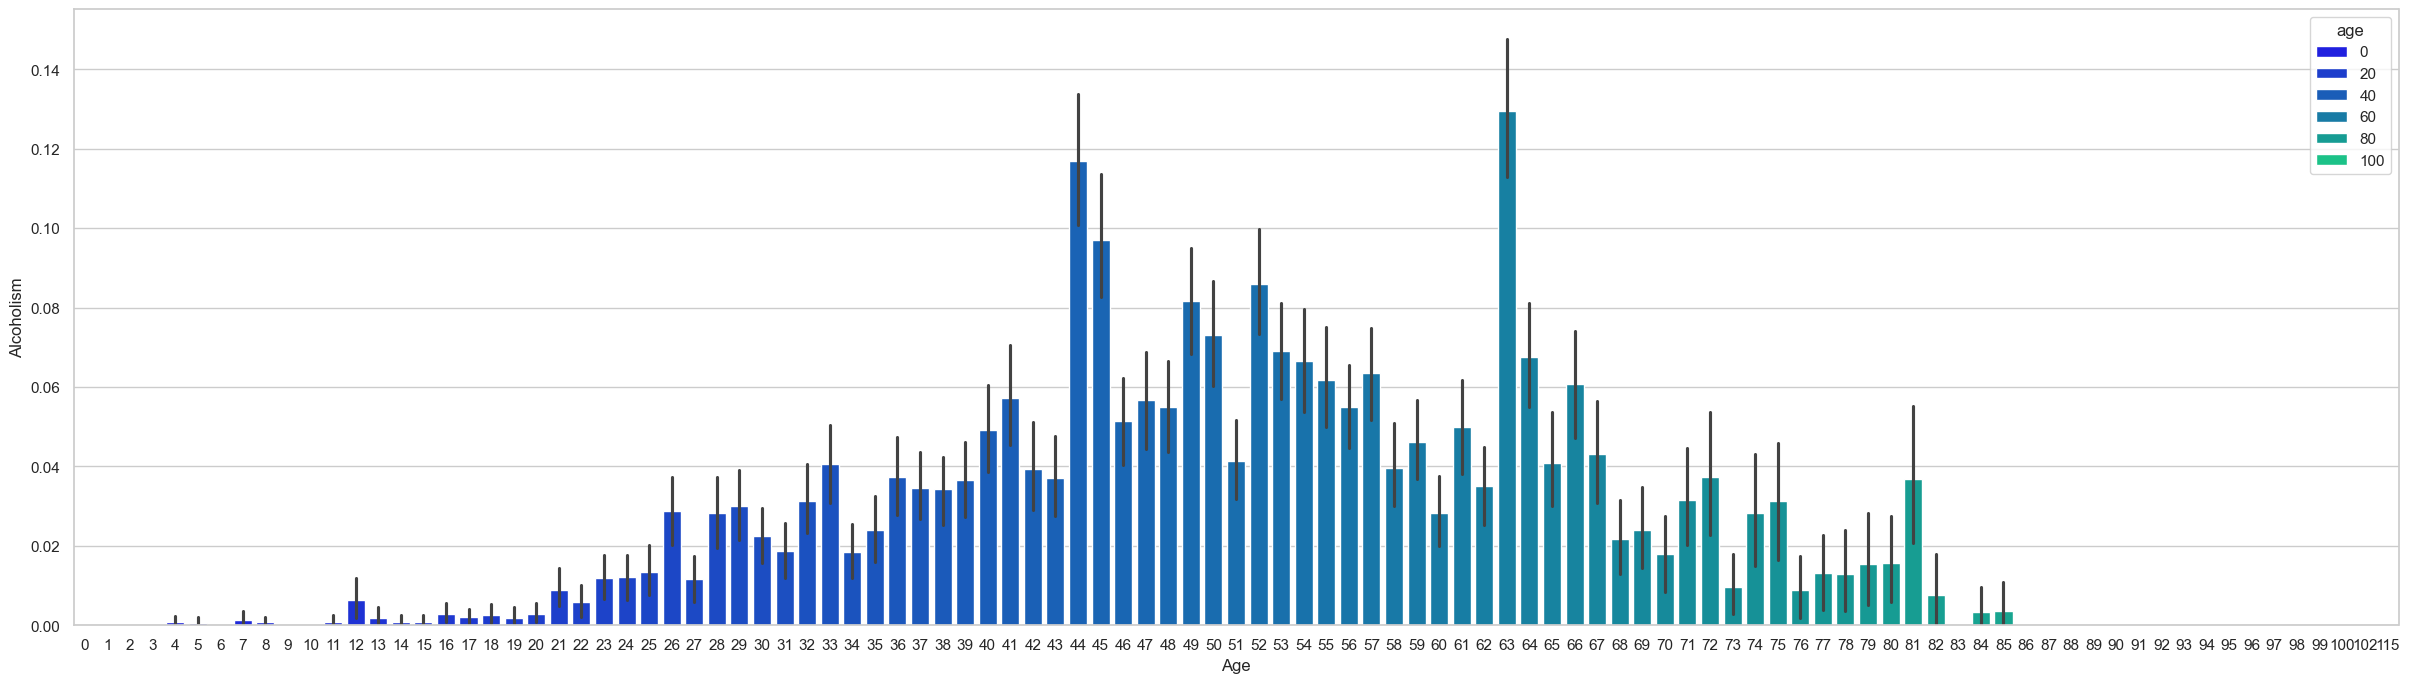

In [18]:
plt.figure(figsize=(30,8))
sns.barplot(data=eda_df, x='age', y='alcoholism', hue='age', palette='winter')
sns.set_theme(style="whitegrid")
plt.xlabel("Age")
plt.ylabel("Alcoholism")
plt.show()

<p>
The bar plot shows a decreasing no show rate as age increases between ages 15 to 80.
</p>

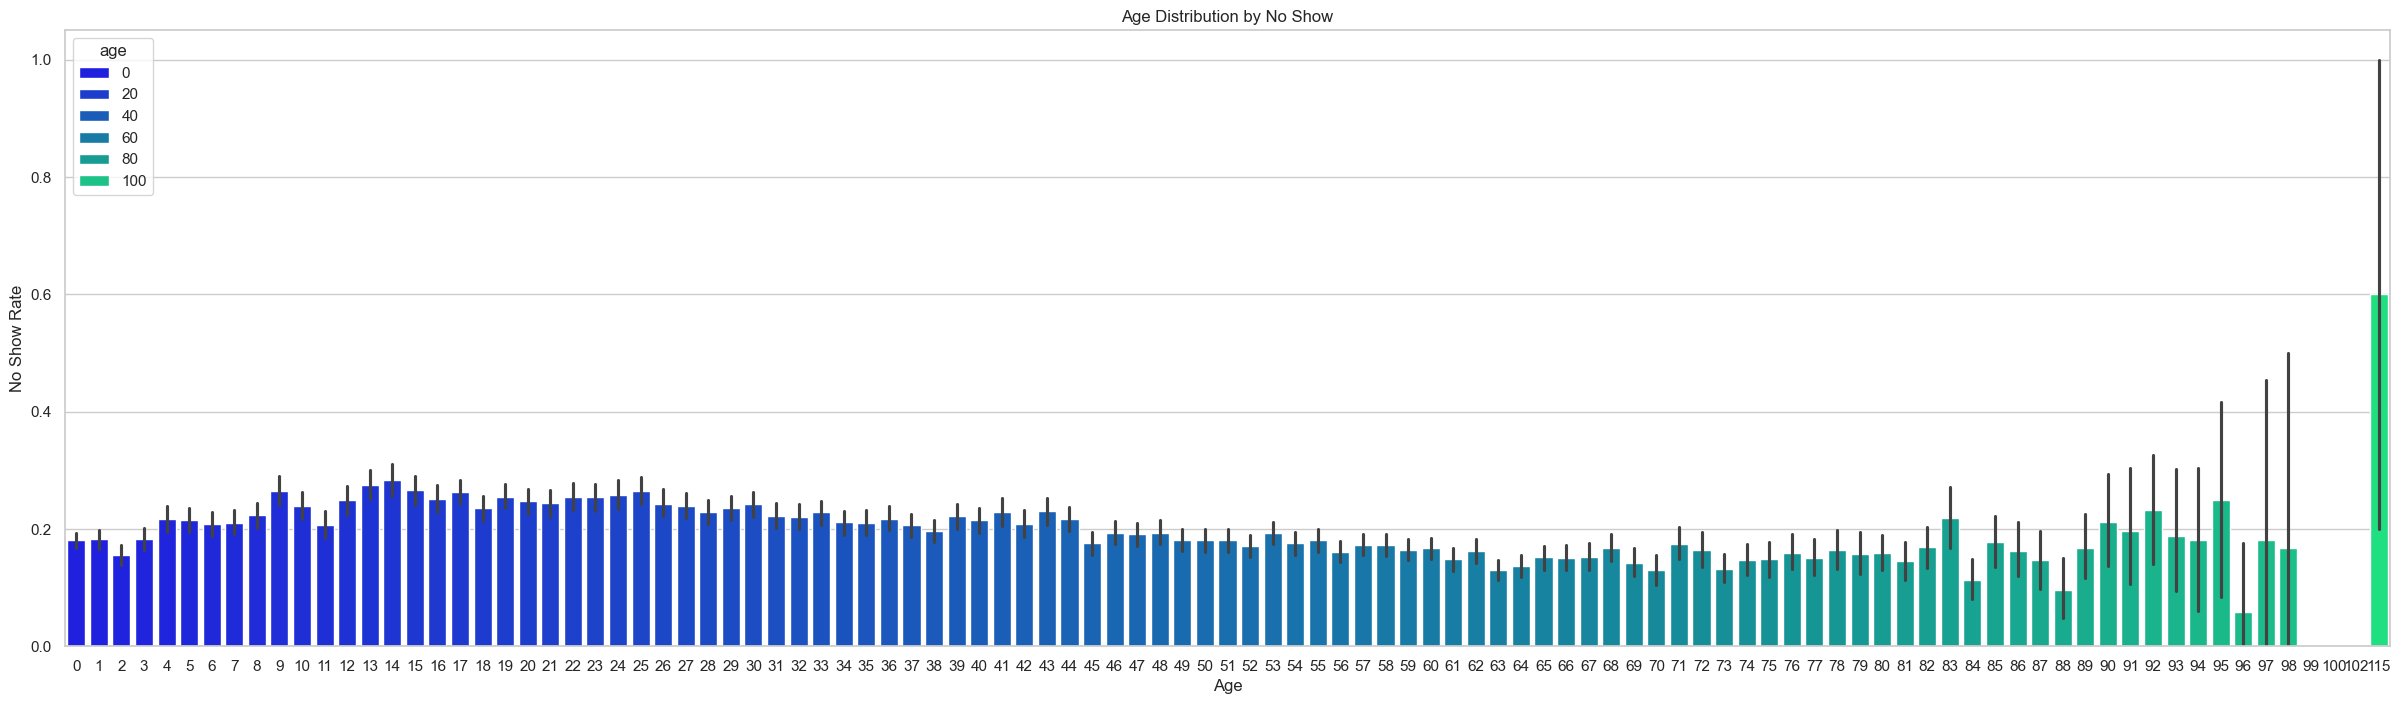

In [19]:
plt.figure(figsize=(30,8))
sns.barplot(data=eda_df, x='age', y='no_show', hue='age', palette='winter')
sns.set_theme(style="whitegrid")
plt.title("Age Distribution by No Show")
plt.xlabel("Age")
plt.ylabel("No Show Rate")
plt.show()

The blow plot proves what the above barplot projection, that there are fewer data points for patients over 90 and over. this the reason why we see volatility on the upper end.

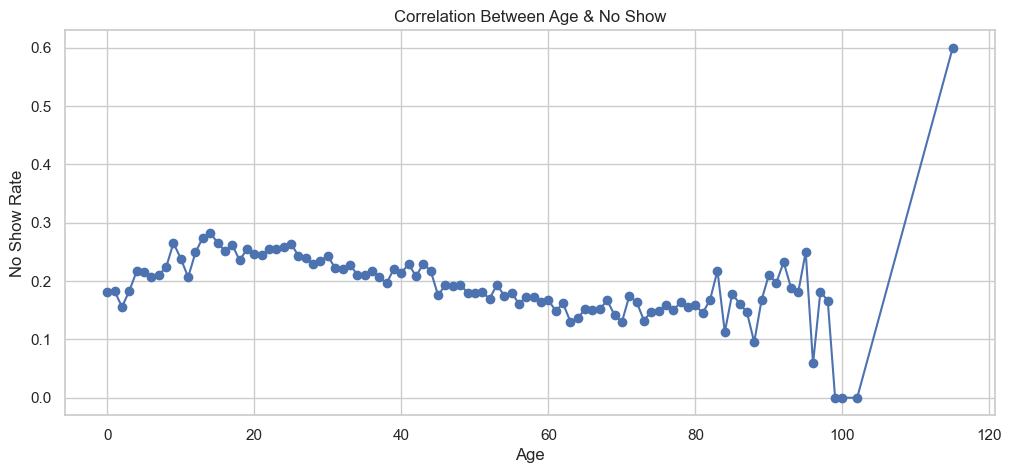

In [20]:
y_mean_value = eda_df['no_show'].groupby(eda_df['age']).mean()
x_age = eda_df['age'].unique()
x_age = sorted(x_age)

plt.figure(figsize=(12,5))
plt.plot(x_age, y_mean_value, marker='o', linestyle='-')
plt.title("Correlation Between Age & No Show")
plt.xlabel("Age")
plt.ylabel("No Show Rate")
plt.xticks(rotation=0)
plt.show()

<h3>ii. Handicap Analysis</h3>

<p>a. Most appointments are made by patients with <i>no handicap</i></p>

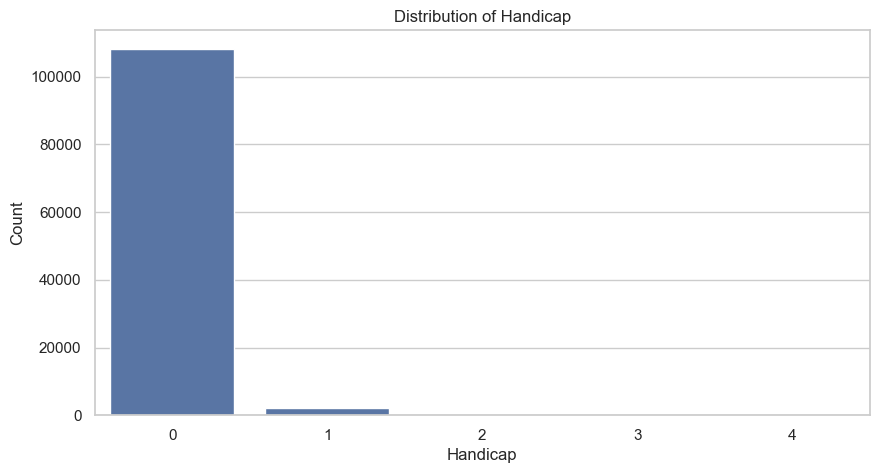

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data=eda_df, x=eda_df.handicap)
plt.title('Distribution of Handicap')
plt.xlabel("Handicap")
plt.ylabel("Count")
plt.show()

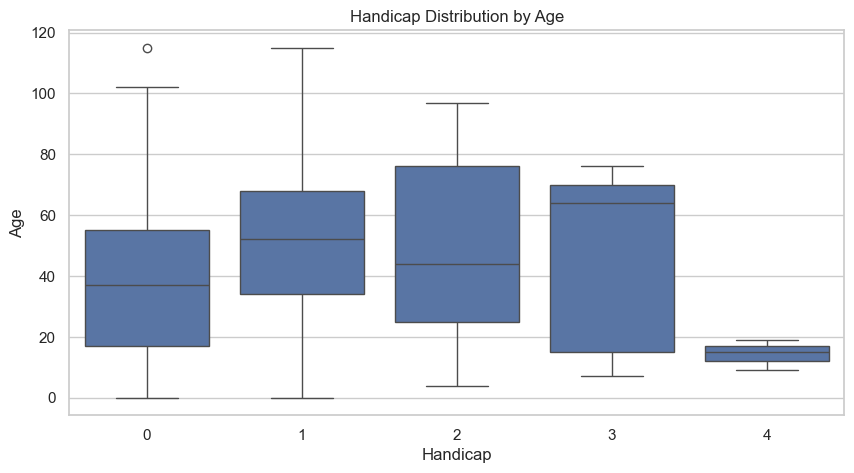

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data=temp_df, x='handicap', y='age')
plt.xlabel("Handicap")
plt.ylabel("Age")
plt.title("Handicap Distribution by Age")
plt.show()

Age distribution of patients with 4 handicaps is every different because we only have a very small sample of these patients.

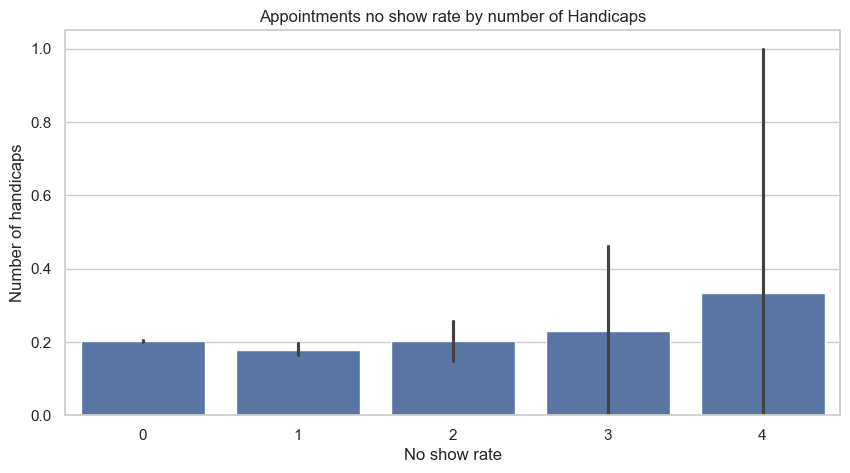

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(temp_df, x='handicap', y='no_show')
plt.xlabel("No show rate")
plt.ylabel("Number of handicaps")
plt.title("Appointments no show rate by number of Handicaps")
plt.show()

<h3>iii. Neighbourhood Analysis</h3>

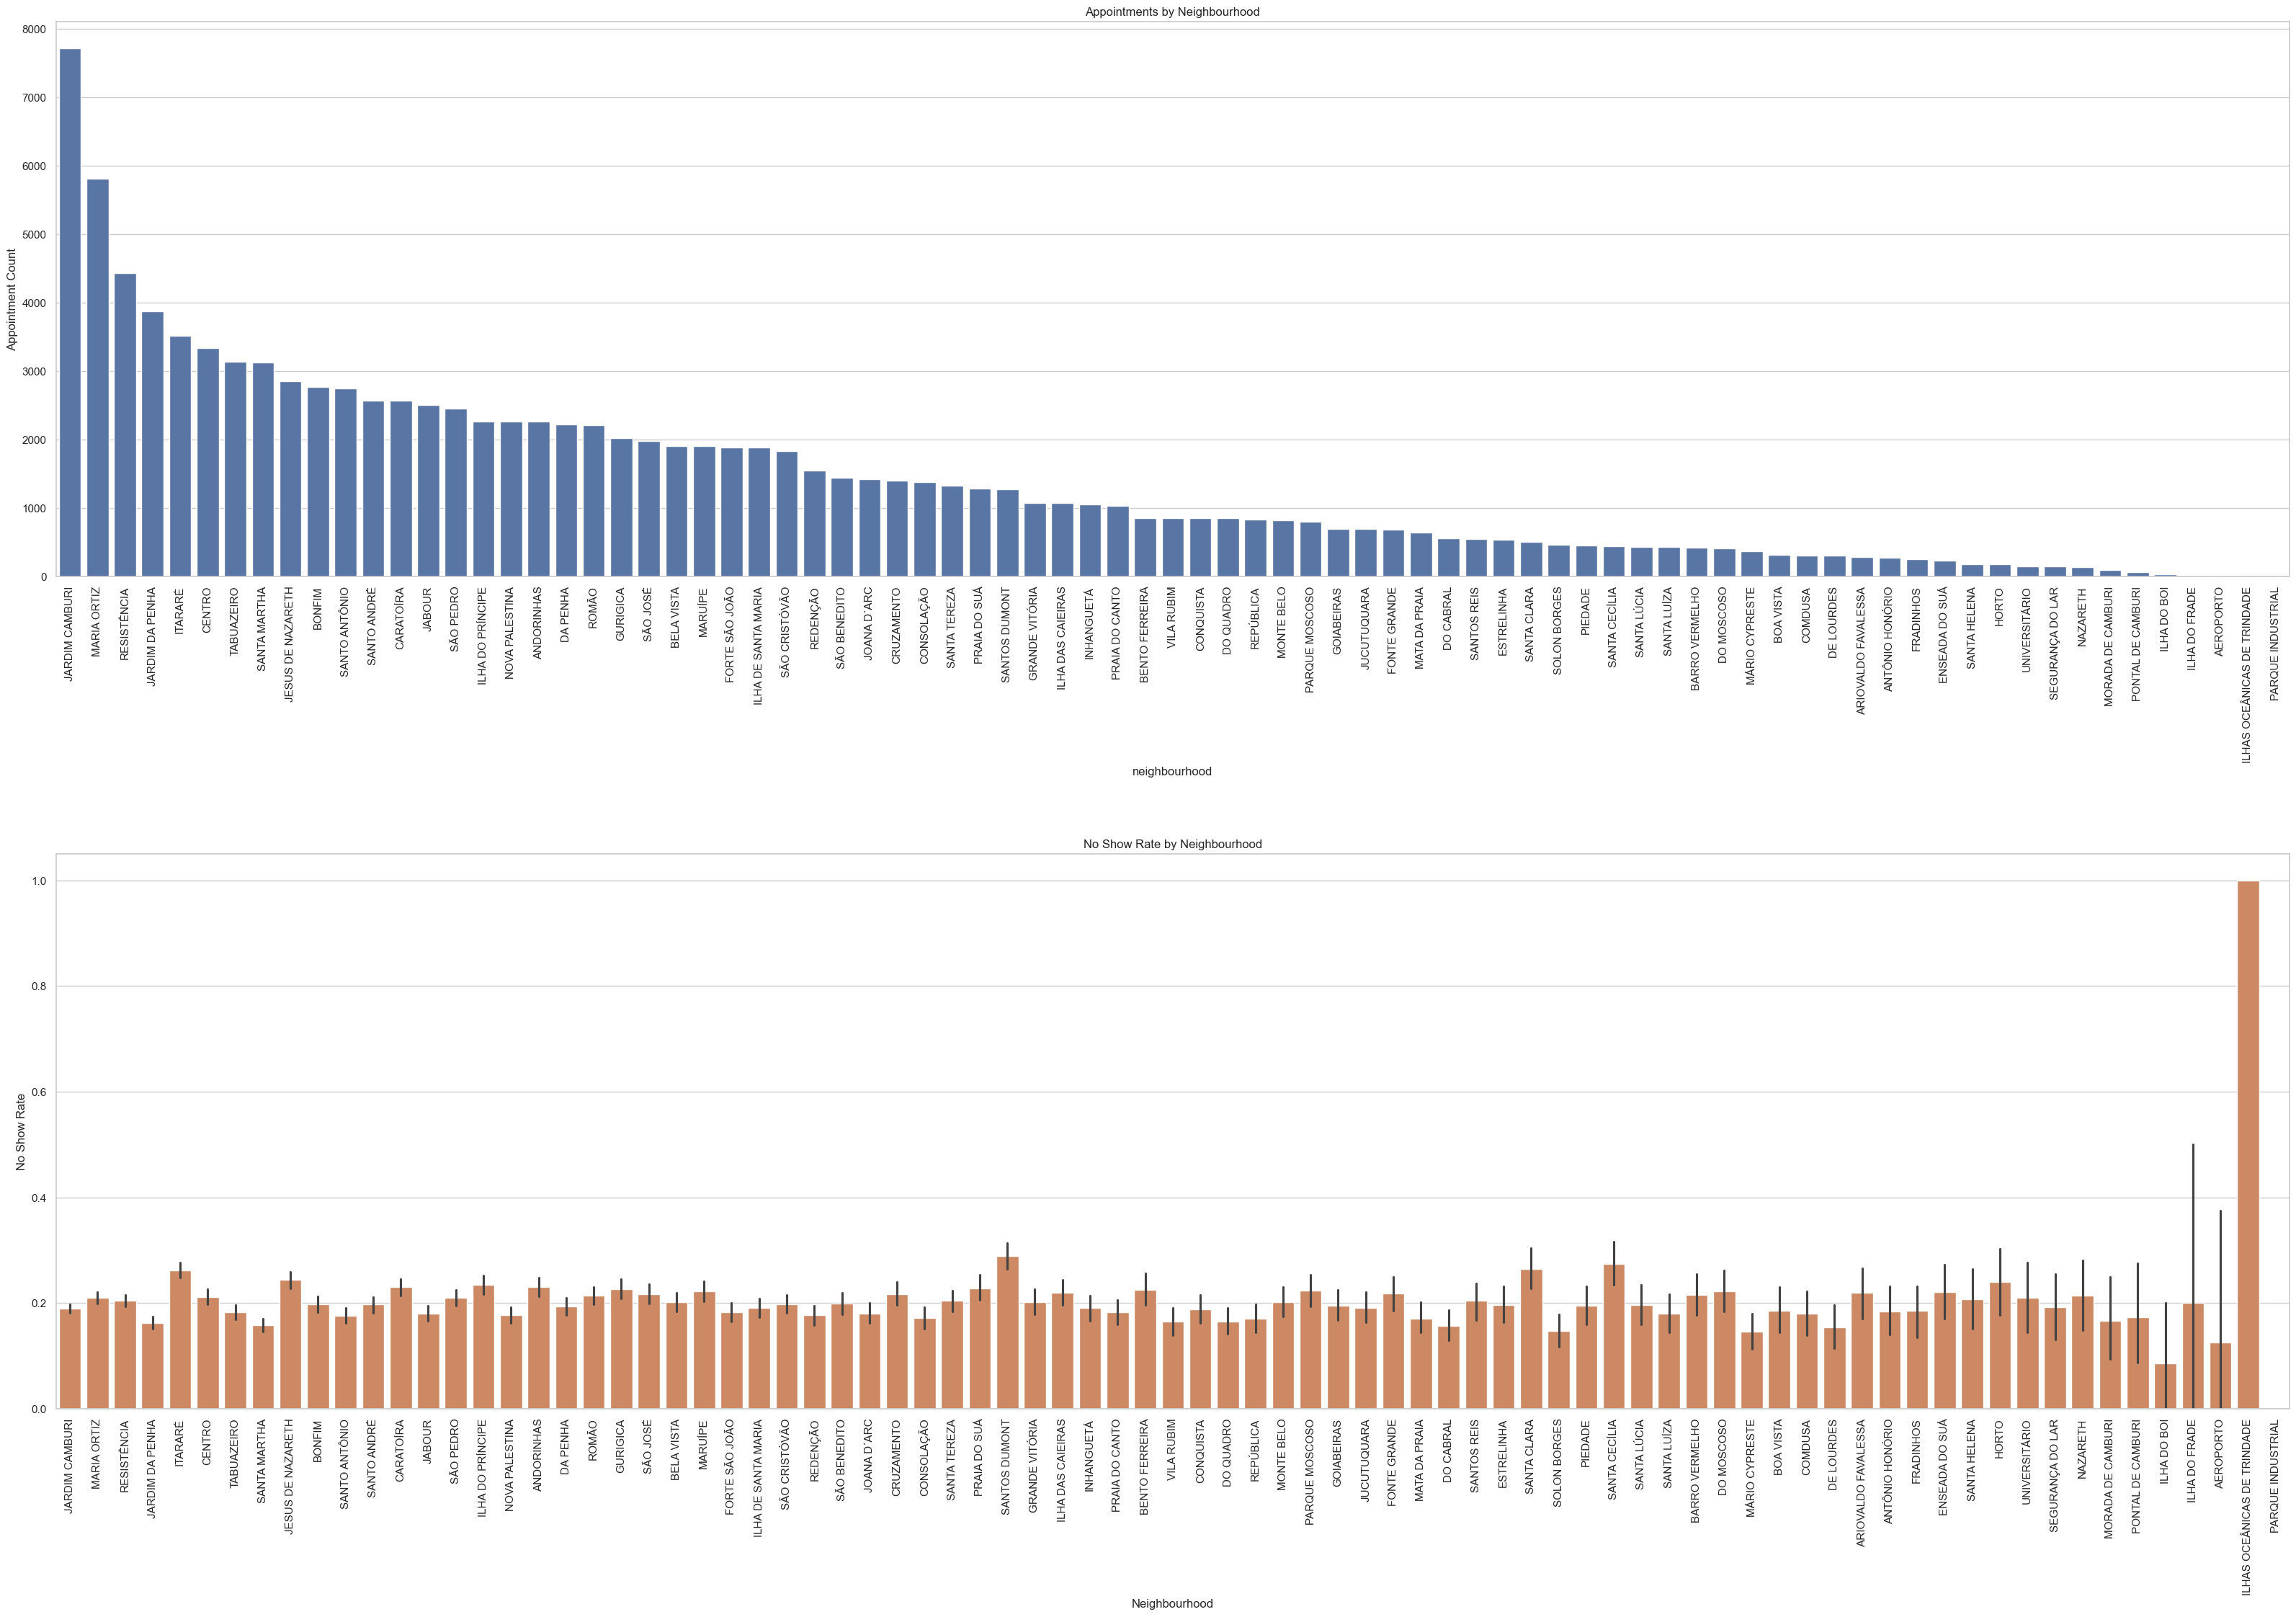

In [24]:
plt.figure(figsize=(40,25))

plt.subplot(2, 1, 1)
plt.xticks(rotation=90)
sns.countplot(data=eda_df, x=eda_df.neighbourhood, order=eda_df['neighbourhood'].value_counts().index, color=sns.color_palette()[0])
sns.set_theme(style="whitegrid")
plt.ylabel('Appointment Count')
plt.title('Appointments by Neighbourhood')

plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.subplot(2, 1, 2)
plt.xticks(rotation=90)
sns.barplot(data=eda_df, x=eda_df.neighbourhood, y=eda_df.no_show, order=eda_df['neighbourhood'].value_counts().index, color=sns.color_palette()[1])
plt.title('No Show Rate by Neighbourhood')
plt.xlabel("Neighbourhood")
plt.ylabel("No Show Rate")
plt.show()

There are a couple of neighbourhoods with a very high no show rate, which is not surprising as these neighbourhoods are also the ones with the highest number of appointments. The neighbourhoods with the highest no show rate are:

<h3>iv. Gender Analysis</h3>

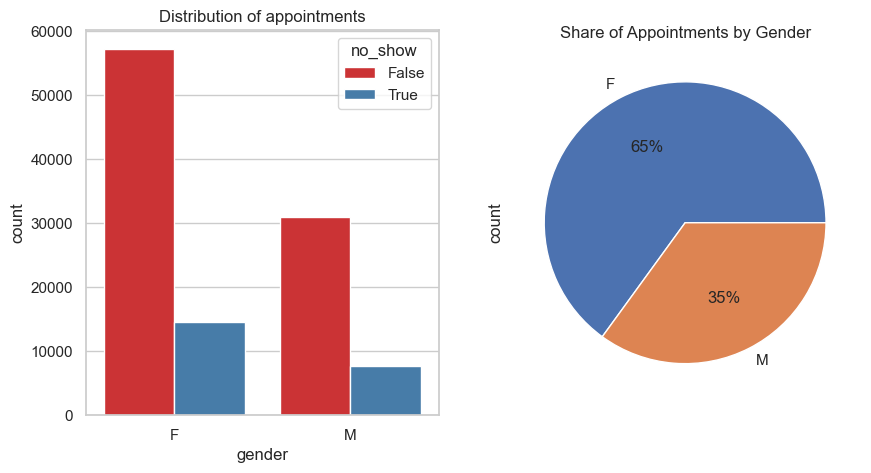

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(eda_df, x='gender', hue='no_show', palette='Set1')
plt.title("Distribution of appointments")

plt.subplot(1,2,2)
eda_df.gender.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Share of Appointments by Gender')
plt.show()

There is are more appointments scheduled by female patients. Female's seems to be either more in need of medical appointments or seeking better care of their health. We can explore this further by looking if they have missed fewer appointments than male patients.

In [26]:
g_total = eda_df['gender'].value_counts()
print("Number of appointments by ", g_total)

Number of appointments by  gender
F    71840
M    38687
Name: count, dtype: int64


In [27]:
print("Number of appointment count by gender\n")
eda_df.groupby(['gender', 'no_show'], observed=True).count()['age']

Number of appointment count by gender



gender  no_show
F       False      57246
        True       14594
M       False      30962
        True        7725
Name: age, dtype: int64

Plotting these counts doesnt help in distinguishing gender differences in no show much because there are many more female patients in our dataset

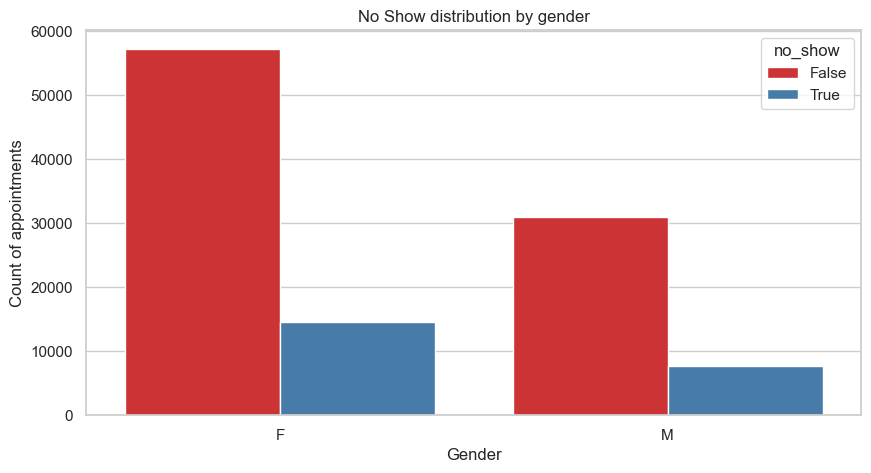

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=eda_df, x='gender', hue='no_show', palette='Set1')
plt.title("No Show distribution by gender")
plt.ylabel('Count of appointments')
plt.xlabel('Gender')
plt.show()

In [29]:
g = eda_df.groupby(['gender', 'no_show'], observed=True).count()['age']
no_show_proportions_female = g['F'] / g_total['F']
print(no_show_proportions_female)

no_show
False    0.796854
True     0.203146
Name: age, dtype: float64


In [30]:
no_show_proportions_male = g['M'] / g_total['M']
print(no_show_proportions_male)

no_show
False    0.800321
True     0.199679
Name: age, dtype: float64


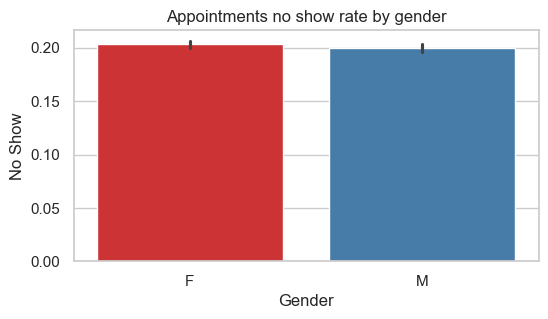

In [31]:
plt.figure(figsize=(6,3))
sns.barplot(data=eda_df, x=eda_df['gender'], y=eda_df['no_show'], hue=eda_df['gender'], palette='Set1')
plt.title('Appointments no show rate by gender')
plt.xlabel('Gender')
plt.ylabel('No Show')
plt.show()

There is no observable large difference in no show proportion among male and female patients. Let's see the distribution of no show for boolean characteristics

<h3>ii. Other patient characteristics</h3>

<h4>a. Subplots with appointment count per decease

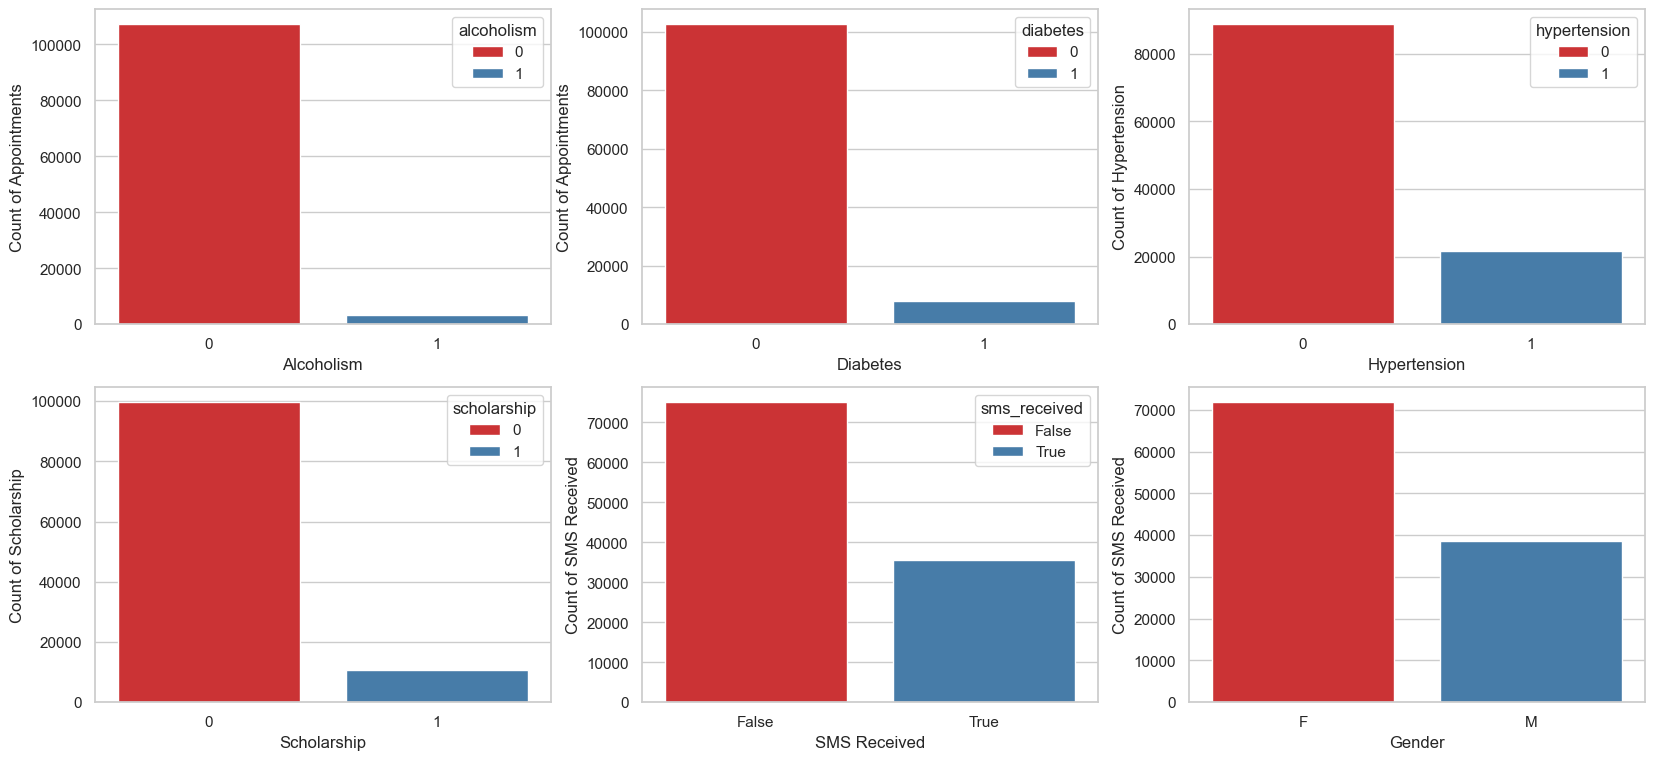

In [32]:
plt.figure(figsize=(20, 9))

plt.subplot(2,3,1)
sns.countplot(eda_df, x=eda_df.alcoholism, hue=eda_df.alcoholism, palette='Set1')
plt.xlabel('Alcoholism')
plt.ylabel('Count of Appointments')

plt.subplot(2,3,2)
sns.countplot(eda_df, x=eda_df.diabetes, hue=eda_df.diabetes, palette='Set1')
plt.xlabel('Diabetes')
plt.ylabel('Count of Appointments')

plt.subplot(2,3,3)
sns.countplot(eda_df, x=eda_df.hypertension, hue=eda_df.hypertension, palette='Set1')
plt.xlabel('Hypertension')
plt.ylabel('Count of Hypertension')

plt.subplot(2,3,4)
sns.countplot(eda_df, x=eda_df.scholarship, hue=eda_df.scholarship, palette='Set1')
plt.xlabel('Scholarship')
plt.ylabel('Count of Scholarship')

plt.subplot(2,3,5)
sns.countplot(eda_df, x=eda_df.sms_received, hue=eda_df.sms_received, palette='Set1')
plt.xlabel('SMS Received')
plt.ylabel('Count of SMS Received')

plt.subplot(2,3,6)
sns.countplot(eda_df, x=eda_df.gender, hue=eda_df.gender, palette='Set1')
plt.xlabel('Gender')
plt.ylabel('Count of SMS Received')

plt.show()

Among available boolean characteristics, we can hypothesise the following:
- There is large number of appointments for which patients were reminded by an SMS, which could decrease the no show rate, which we need to explore further.
- Lot of appointments was made by patients with hypertension and group could be more likely not to miss the appointment because they need to get their medication regularly. The same could hold for diabetes patients.
- Alcoholism patients could be more likely to miss their appointments due to their addiction and other issues in comparison to patients who are none-alcoholics.

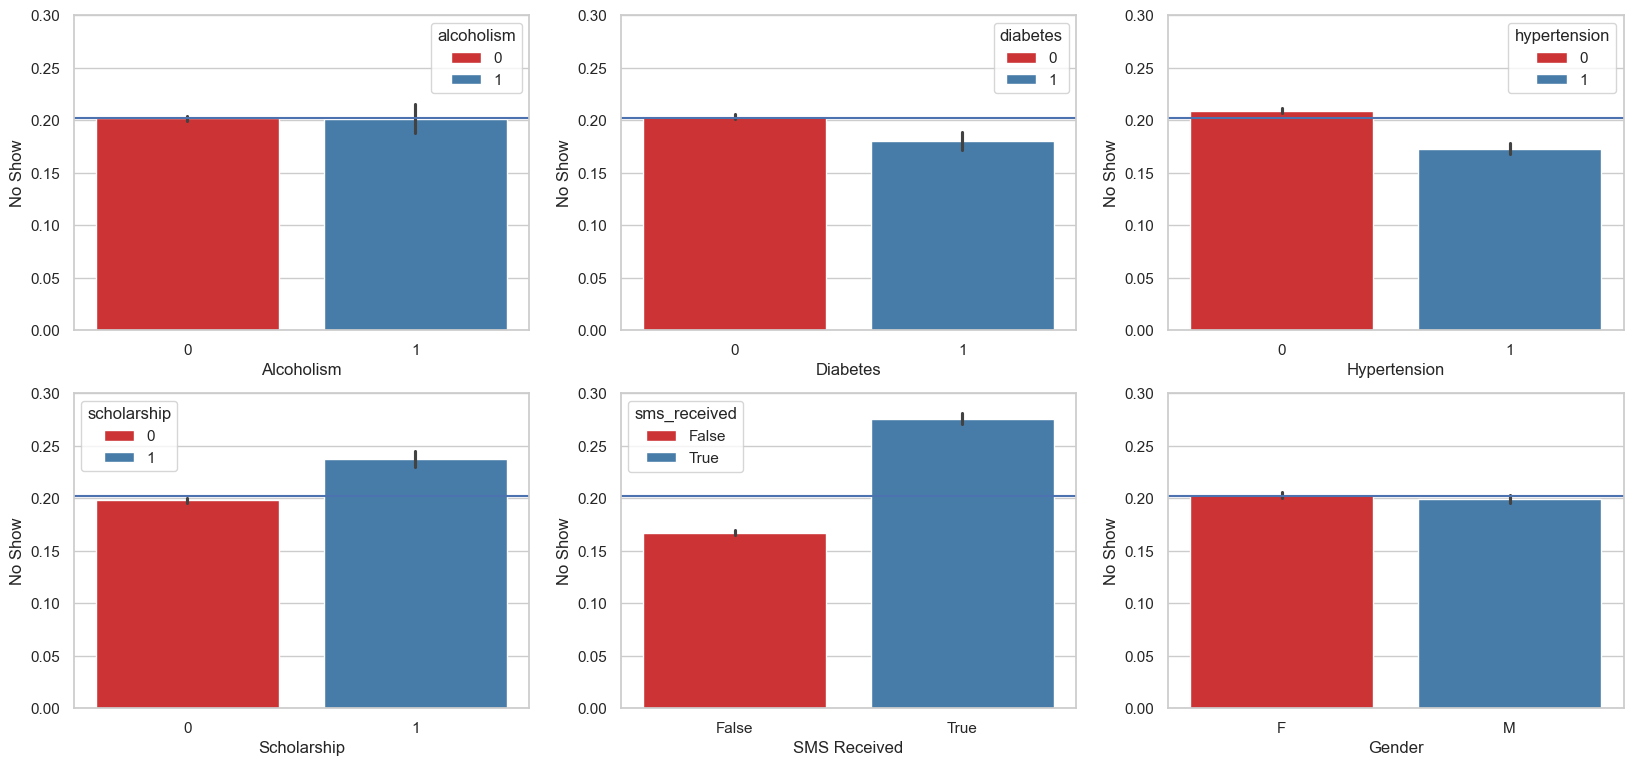

In [33]:
no_show_proportion = eda_df.no_show.sum() / len(eda_df.index)

plt.figure(figsize=(20, 9))

plt.subplot(2,3,1)
sns.barplot(data=eda_df, x=eda_df['alcoholism'], y=eda_df['no_show'], hue=eda_df['alcoholism'], palette='Set1')
plt.ylim(0,0.3)
plt.xlabel('Alcoholism')
plt.ylabel('No Show')
plt.axhline(no_show_proportion)

plt.subplot(2,3,2)
sns.barplot(data=eda_df, x=eda_df['diabetes'], y=eda_df['no_show'], hue=eda_df['diabetes'], palette='Set1')
plt.ylim(0,0.3)
plt.xlabel('Diabetes')
plt.ylabel('No Show')
plt.axhline(no_show_proportion)

plt.subplot(2,3,3)
sns.barplot(data=eda_df, x=eda_df['hypertension'], y=eda_df['no_show'], hue=eda_df['hypertension'], palette='Set1')
plt.ylim(0,0.3)
plt.xlabel('Hypertension')
plt.ylabel('No Show')
plt.axhline(no_show_proportion)

plt.subplot(2,3,4)
sns.barplot(data=eda_df, x=eda_df['scholarship'], y=eda_df['no_show'], hue=eda_df['scholarship'], palette='Set1')
plt.ylim(0,0.3)
plt.xlabel('Scholarship')
plt.ylabel('No Show')
plt.axhline(no_show_proportion)

plt.subplot(2,3,5)
sns.barplot(data=eda_df, x=eda_df['sms_received'], y=eda_df['no_show'], hue=eda_df['sms_received'], palette='Set1')
plt.ylim(0,0.3)
plt.xlabel('SMS Received')
plt.ylabel('No Show')
plt.axhline(no_show_proportion)

plt.subplot(2,3,6)
sns.barplot(data=eda_df, x=eda_df['gender'], y=eda_df['no_show'], hue=eda_df['gender'], palette='Set1')
plt.ylim(0,0.3)
plt.xlabel('Gender')
plt.ylabel('No Show')
plt.axhline(no_show_proportion)

plt.show()

Above plots explains that alcoholism makes no difference in no show rate. while appointments of patients with hypertension or diabetes have lower no-show up rate than those without the disease. Appointments of patients on scholarship or with a received SMS have higher no show rates than appointments without a scholarship or a received SMS, respectively.

<h4>b. Combine characteristics of diseases with low no-show rates

In [34]:
diabetes_hypertension_issues = eda_df.query("diabetes == True and hypertension == True and handicap > 0")
print(len(diabetes_hypertension_issues))

358


In [35]:
no_show_diabetes_hypertension_combined = eda_df.query('no_show == True and diabetes == True and hypertension == True and handicap > 0')
print(len(no_show_diabetes_hypertension_combined))

55


In [36]:
no_show_percentage_combined_issues = len(no_show_diabetes_hypertension_combined) / len(diabetes_hypertension_issues)
print(no_show_percentage_combined_issues)

0.15363128491620112


In [37]:
scholarship_sms_received_combined = eda_df.query('scholarship == True and sms_received == True')
print(len(scholarship_sms_received_combined))

3505


A high no-show rate is shown for the above combination

In [38]:
no_show_scholarship_sms_received_combined = eda_df.query('no_show == True and scholarship == True and sms_received == True')
print(len(scholarship_sms_received_combined))

3505


In [39]:
no_show_share_combined_issues_2 = len(no_show_scholarship_sms_received_combined) / len(scholarship_sms_received_combined)
no_show_share_combined_issues_2

0.3378031383737518

<h5>Observations</h5>

<ul>
    <li>
       When looking at appointments of patiensts with a handicap, diabetes, and hypertension combined, we see that this group has no-show rate of only 15%.
    </li>
    <li>
       On the other hand, appointments of patients on scholarsip which also received an SMS have a no-show rate 34%
    </li>
</ul>

<h4>c. Future no-show share among advanced bookings of appointments.</h4>

Count number of days between appointment scheduled day and appointment day.

In [40]:
eda_df['lead_time'] = (pd.to_datetime(eda_df['appointment_day']) - pd.to_datetime(eda_df['scheduled_day'])).dt.days.astype('int64')
eda_df['lead_time'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: lead_time, dtype: float64

Extracted just days from the calculated difference

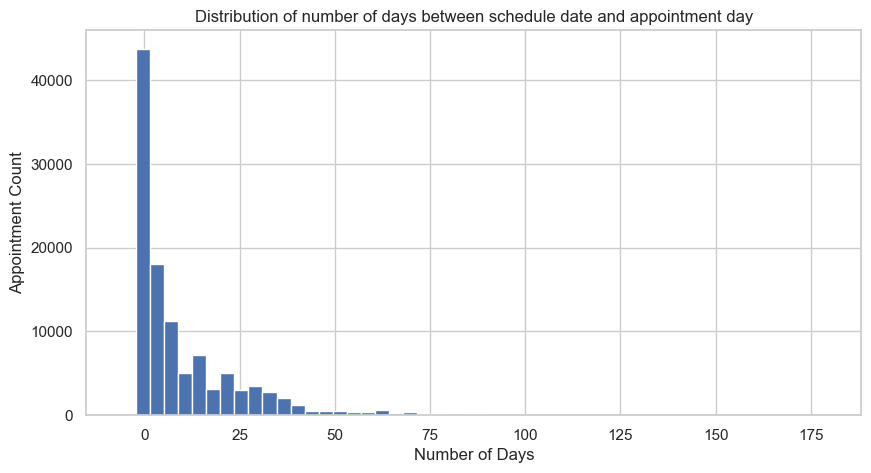

In [41]:
plt.figure(figsize=(10,5))
eda_df.lead_time.hist(bins=50)
plt.title('Distribution of number of days between schedule date and appointment day')
plt.xlabel('Number of Days')
plt.ylabel('Appointment Count')
plt.show()

<t>Distribution of date differences</t>
<p>There are many appointments with schedule and appointment at the same day, which means that patients are probably not scheduling in advance this would suggest that no shows for day difference equal to 0 should be close to 0%, lets look into it below.</p>

In [42]:
result = eda_df[eda_df['lead_time'] < 0]
result

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lead_time
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,False,True,-1
55226,7896293967868,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,False,True,-1
64175,24252258389979,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,False,True,-1
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,False,True,-6
72362,3787481966821,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,False,True,-1


<p>There are 5 appointments with negative lead time which could be attributed to user errors. they will be change to 0.</p>

In [43]:
eda_df['lead_time'] = eda_df['lead_time'].clip(lower=0)
eda_df

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lead_time
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,False,False,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,False,False,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,False,False,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,False,False,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,True,False,35
110523,3596266328735,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,True,False,35
110524,15576631729893,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,True,False,41
110525,92134931435557,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,True,False,41


In [44]:
print("Number of appointments scheduled and occurred on same day : ", len(eda_df.query('lead_time == 0')))
print("Number of appointments scheduled and didn't occur on same day : ", len(eda_df.query('lead_time > 0')))

Number of appointments scheduled and occurred on same day :  38568
Number of appointments scheduled and didn't occur on same day :  71959


In [45]:
eda_df['lead_time'].describe()

count    110527.000000
mean         10.183792
std          15.254924
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: lead_time, dtype: float64

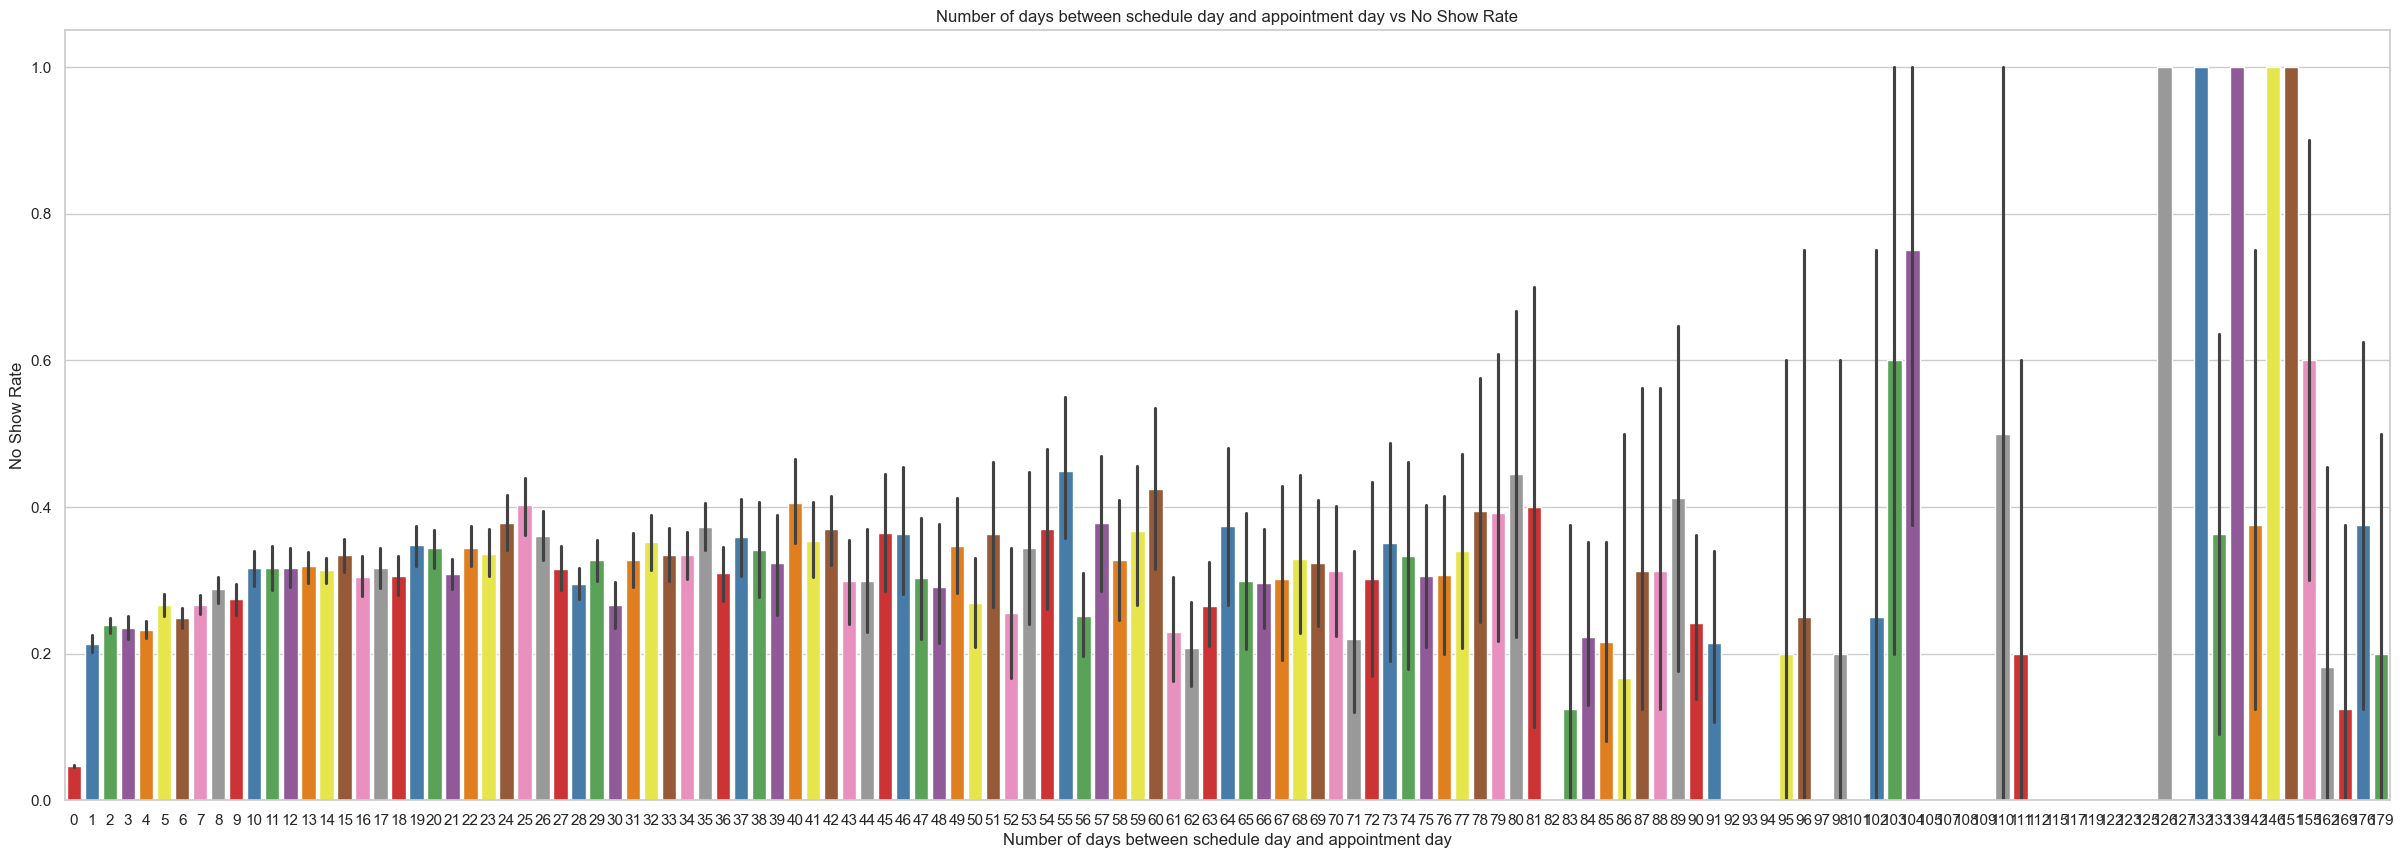

In [46]:
plt.figure(figsize=(30,10))
sns.barplot(data=eda_df, x='lead_time', y='no_show', hue='lead_time', palette='Set1')
plt.xlabel('Number of days between schedule day and appointment day')
plt.ylabel('No Show Rate')
plt.title('Number of days between schedule day and appointment day vs No Show Rate')
plt.legend().remove()
plt.show()

Appointments that take place on the same day they are scheduled have a notably lower no-show rate, approximately 20%. In contrast, appointments scheduled for a later date typically exhibit no-show rates above 20%. This indicates a significant relationship between the immediacy of an appointment and patient attendance, underscoring the value of precise scheduling.

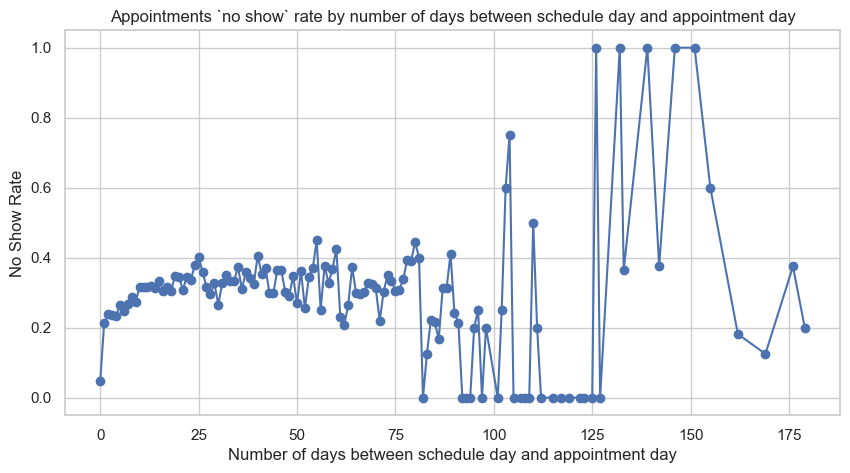

In [47]:
y_mean_value = eda_df['no_show'].groupby(eda_df['lead_time']).mean()
x_date_diff = eda_df['lead_time'].unique()
x_date_diff = sorted(x_date_diff)
plt.figure(figsize=(10,5))
plt.plot(x_date_diff, y_mean_value, marker='o', linestyle='-')
plt.title("Appointments `no show` rate by number of days between schedule day and appointment day")
plt.xlabel("Number of days between schedule day and appointment day")
plt.ylabel("No Show Rate")
plt.show()

There are fewer data points for lead time higher than 50 days, because of that we see volatility in the no show in upper-end. lets take a closer look at that the relevent part.

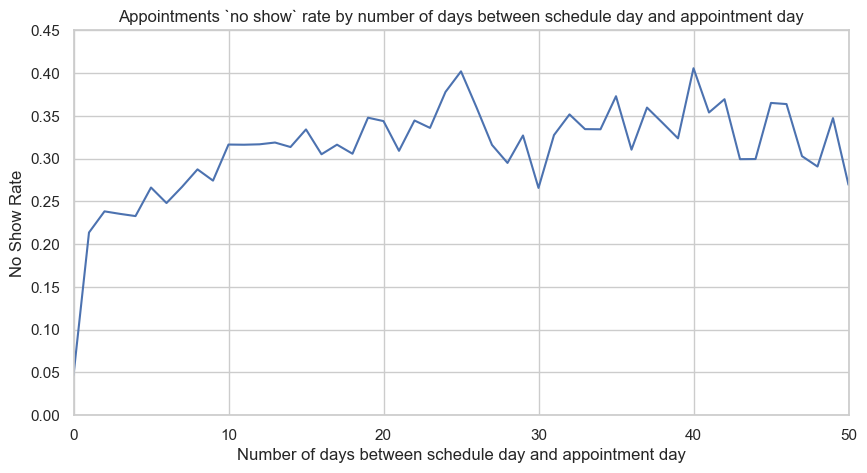

In [48]:
y_mean_value = eda_df['no_show'].groupby(eda_df['lead_time']).mean()
x_date_diff = eda_df['lead_time'].unique()
x_date_diff = sorted(x_date_diff)

plt.figure(figsize=(10,5))
plt.errorbar(x_date_diff, y_mean_value)
plt.title("Appointments `no show` rate by number of days between schedule day and appointment day")
plt.xlabel("Number of days between schedule day and appointment day")
plt.ylabel("No Show Rate")
plt.xlim(0, 50)
plt.ylim(0, 0.45)
plt.show()

The lead time between scheduling and the appointment appears to be a significant factor. An increasing no-show rate is observable within the initial 20-day lead time period. Generally, a longer interval between scheduling and the appointment day correlates with a higher no-show rate in this dataset.

Given that 38,568 appointments have a zero-day lead time, it may be insightful to re-examine the data by excluding these same-day appointments. This subset is anticipated to exhibit generally higher no-show rates. We will revisit the primary no-show charts from Q1 using this filtered data for further analysis.

i. Filter 0 lead time (days) out of the data frame

In [49]:
df_0 = eda_df.query('lead_time > 0').copy()
df_0.shape

(71959, 15)

ii. Overall no-show rate in the zero lead-time dataset

In [50]:
no_show_segment = df_0['no_show'].sum() / len(df_0.index)
no_show_segment

0.285190177740102

Subplot for each of the categories. the overall no show rate is show by horizontal line

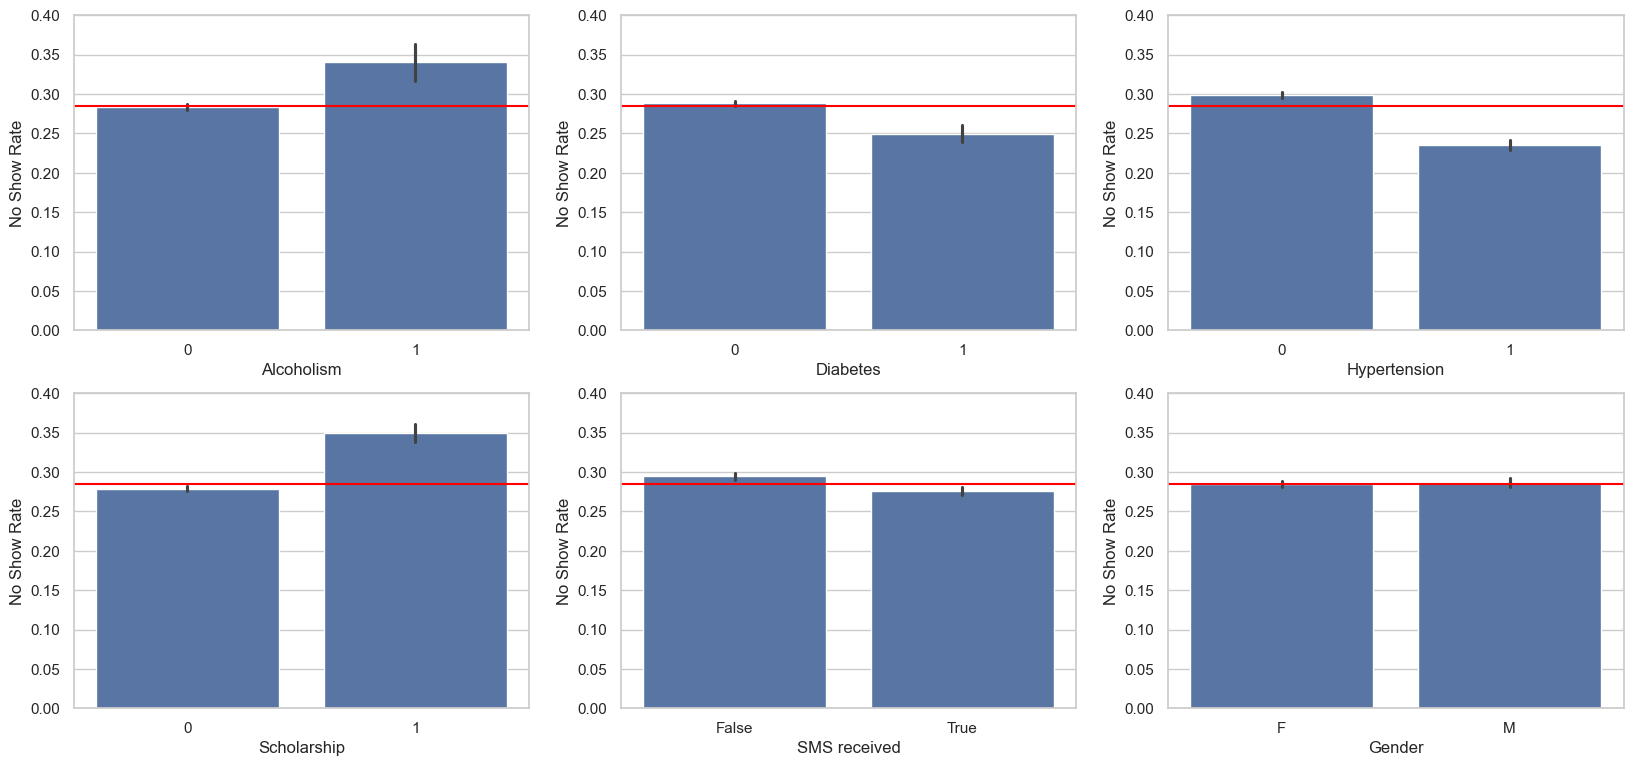

In [51]:
plt.figure(figsize=(20, 9))
plt.subplot(2,3,1)
sns.barplot(data=df_0, x=df_0['alcoholism'], y=df_0['no_show'] )
plt.xlabel('Alcoholism')
plt.ylabel('No Show Rate')
plt.axhline(no_show_segment, color='red')
plt.ylim(0,0.4)

plt.subplot(2,3,2)
sns.barplot(data=df_0, x=df_0['diabetes'], y=df_0['no_show'] )
plt.xlabel('Diabetes')
plt.ylabel('No Show Rate')
plt.axhline(no_show_segment, color='red')
plt.ylim(0,0.4)

plt.subplot(2,3,3)
sns.barplot(data=df_0, x=df_0['hypertension'], y=df_0['no_show'] )
plt.xlabel('Hypertension')
plt.ylabel('No Show Rate')
plt.axhline(no_show_segment, color='red')
plt.ylim(0,0.4)

plt.subplot(2,3,4)
sns.barplot(data=df_0, x=df_0['scholarship'], y=df_0['no_show'] )
plt.xlabel('Scholarship')
plt.ylabel('No Show Rate')
plt.axhline(no_show_segment, color='red')
plt.ylim(0,0.4)

plt.subplot(2,3,5)
sns.barplot(data=df_0, x=df_0['sms_received'], y=df_0['no_show'] )
plt.xlabel('SMS received')
plt.ylabel('No Show Rate')
plt.axhline(no_show_segment, color='red')
plt.ylim(0,0.4)

plt.subplot(2,3,6)
sns.barplot(data=df_0, x=df_0['gender'], y=df_0['no_show'] )
plt.xlabel('Gender')
plt.ylabel('No Show Rate')
plt.axhline(no_show_segment, color='red')
plt.ylim(0,0.4)

plt.show()

Restricting the analysis to appointments arranged at least 24 hours ahead reveals a few changes in the pattern. Patients with alcoholism miss appointments noticeably more often than the overall average. SMS reminders now show a beneficial effect: slots accompanied by a text reminder have lower no-show rates than those without one. All other observed factors remain unchanged.

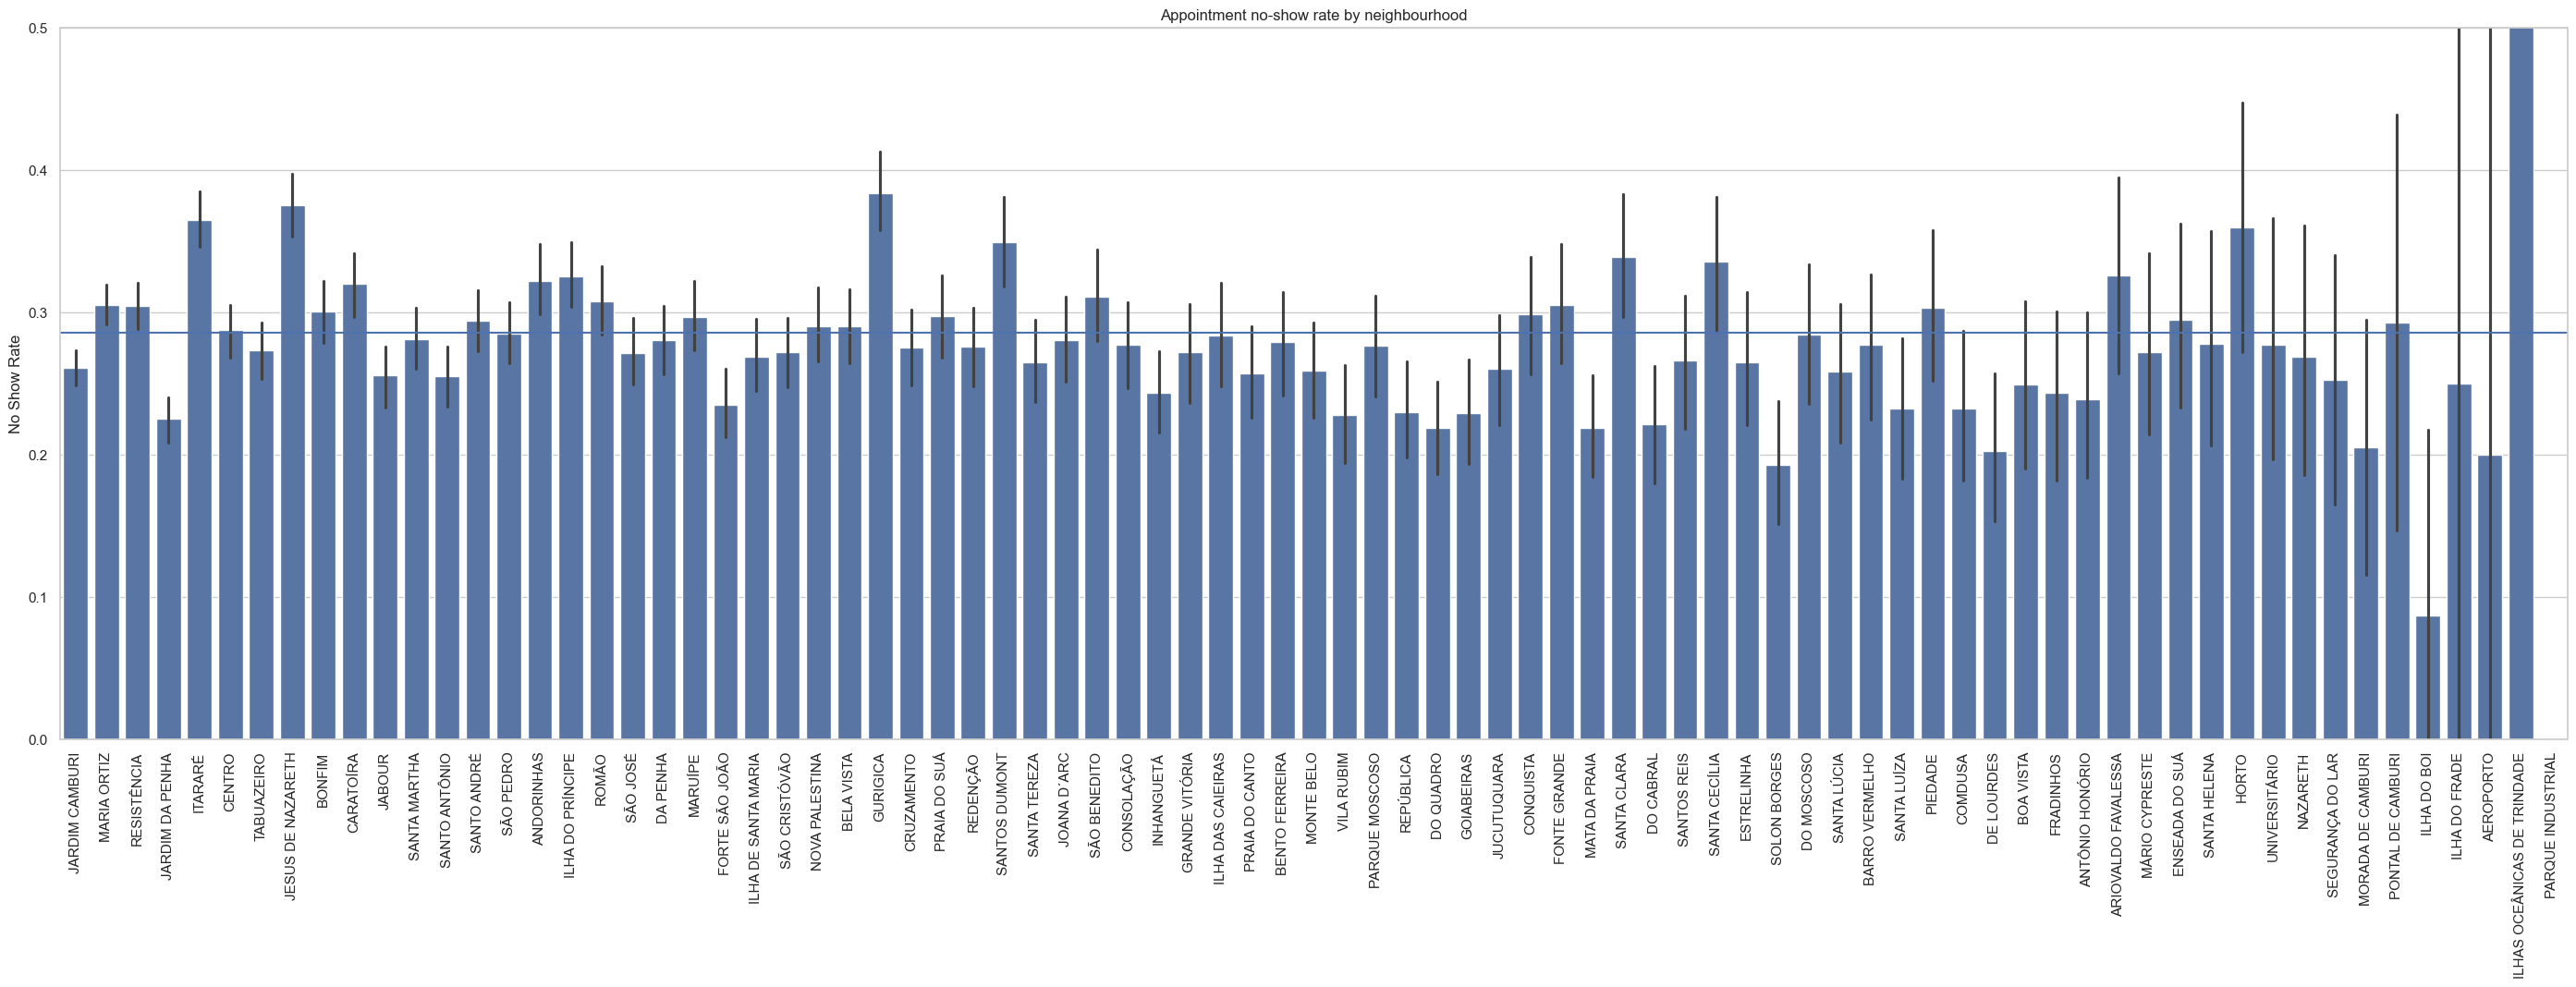

In [52]:
plt.figure(figsize=(35,10))
plt.xticks(rotation=90)
sns.barplot(data=df_0, x=df_0['neighbourhood'], y=df_0['no_show'], order=df_0['neighbourhood'].value_counts().index)
plt.title('Appointment no-show rate by neighbourhood')
plt.ylabel('No Show Rate')
plt.xlabel('')
plt.ylim(0,0.5)
plt.axhline(no_show_segment)

plt.show()

Neighbourhoods hasn't deviate widely from the overall no-show rate

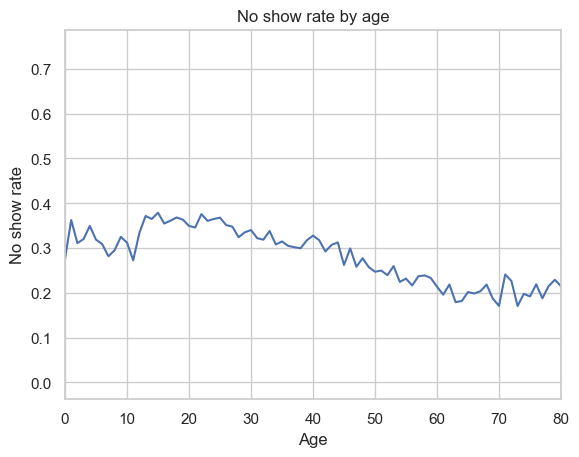

In [53]:
y_mean = df_0['no_show'].groupby(df_0['age']).mean()
x_age = df_0['age'].unique()
x_age = sorted(x_age)

plt.title('No show rate by age')
plt.errorbar(x = x_age, y = y_mean)
plt.xlabel('Age')
plt.ylabel('No show rate')
plt.xlim(0,80)
plt.show()

<p>No show frequency and days of the week.</p>

In [54]:
dow = pd.to_datetime(df_0['appointment_day']).dt.day_name()
df_0 = df_0.assign(appointment_day_of_week = dow)
df_0.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lead_time,appointment_day_of_week
5,95985133231274,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,False,False,2,Friday
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,False,True,2,Friday
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,False,True,2,Friday
9,78124564369297,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,False,False,2,Friday
10,734536231958495,5630213,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,False,False,2,Friday


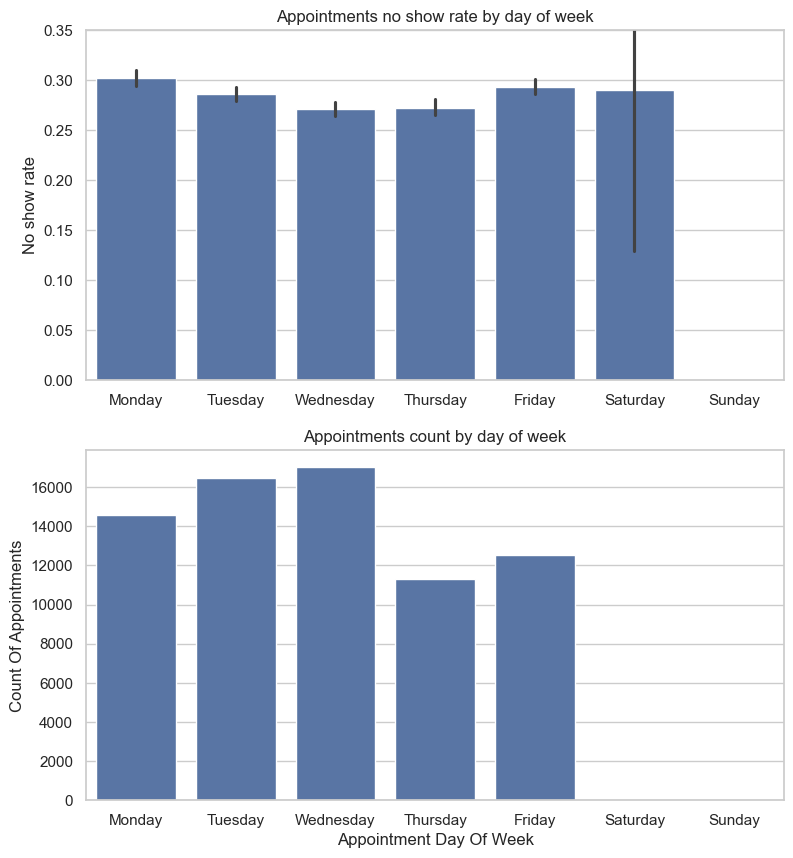

In [55]:
day_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize = (9,10))

plt.subplot(2, 1, 1)
sns.barplot(x=df_0['appointment_day_of_week'], y=df_0['no_show'], order=day_of_week)
plt.xlabel('')
plt.ylabel('No show rate')
plt.ylim(0,0.35)
plt.title('Appointments no show rate by day of week')

plt.subplot(2, 1, 2)
sns.countplot(data=df_0, x = 'appointment_day_of_week', order = day_of_week)
plt.xlabel('Appointment Day Of Week')
plt.ylabel('Count Of Appointments')
plt.title('Appointments count by day of week')

plt.show()

The No Show on friday is higher on comparison to tuesday, wednesday or thursday, but is very comparable to no show rate on Monday's. Monday, Tuesday, and Wednesday are the favourite days for appointments.

<h6>SMS Reminder's and Impact on reducing the no-shows</h6>

In [56]:
tmp_df = df_0.drop(['gender','scheduled_day','appointment_day','neighbourhood','appointment_day_of_week'], axis=1)

In [57]:
# Let's recap using earlier data set
temp_df.corr().style.background_gradient(cmap='Blues')

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
patient_id,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749,-0.001461
appointment_id,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618,-0.162602
age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292392,0.095811,0.078033,0.012643,-0.060319
scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,0.029135
hypertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,-0.035701
diabetes,0.001605,0.022628,0.292392,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,-0.015180
alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,-0.000196
handicap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,-0.006076
sms_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,0.126431
no_show,-0.001461,-0.162602,-0.060319,0.029135,-0.035701,-0.015180,-0.000196,-0.006076,0.126431,1.000000


In [58]:
tmp_df.corr().style.background_gradient(cmap='Blues')

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lead_time
patient_id,1.000000,-0.003452,-0.004761,-0.001842,-0.002550,-0.000153,0.005210,-0.003985,-0.005427,0.003342,0.006272
appointment_id,-0.003452,1.000000,0.019069,0.017534,0.043821,0.040145,0.025299,0.011384,-0.083738,-0.065723,-0.788988
age,-0.004761,0.019069,1.000000,-0.103038,0.500749,0.284477,0.080350,0.077141,-0.042537,-0.101042,-0.008608
scholarship,-0.001842,0.017534,-0.103038,1.000000,-0.027764,-0.025417,0.030529,-0.010446,0.020666,0.045687,-0.026177
hypertension,-0.002550,0.043821,0.500749,-0.027764,1.000000,0.425614,0.085821,0.083643,-0.037065,-0.056859,-0.051121
diabetes,-0.000153,0.040145,0.284477,-0.025417,0.425614,1.000000,0.024174,0.061513,-0.031219,-0.022412,-0.048246
alcoholism,0.005210,0.025299,0.080350,0.030529,0.085821,0.024174,1.000000,0.013501,-0.009095,0.019864,-0.029137
handicap,-0.003985,0.011384,0.077141,-0.010446,0.083643,0.061513,0.013501,1.000000,-0.022107,-0.007184,-0.015865
sms_received,-0.005427,-0.083738,-0.042537,0.020666,-0.037065,-0.031219,-0.009095,-0.022107,1.000000,-0.020631,0.201789
no_show,0.003342,-0.065723,-0.101042,0.045687,-0.056859,-0.022412,0.019864,-0.007184,-0.020631,1.000000,0.060362


We can compare with earlier correlation between `sms_received` and `no_show`. In earlier dataset sms received vs no show was positive. while the latest shows a negative. Lets look at a subplot with the full data.

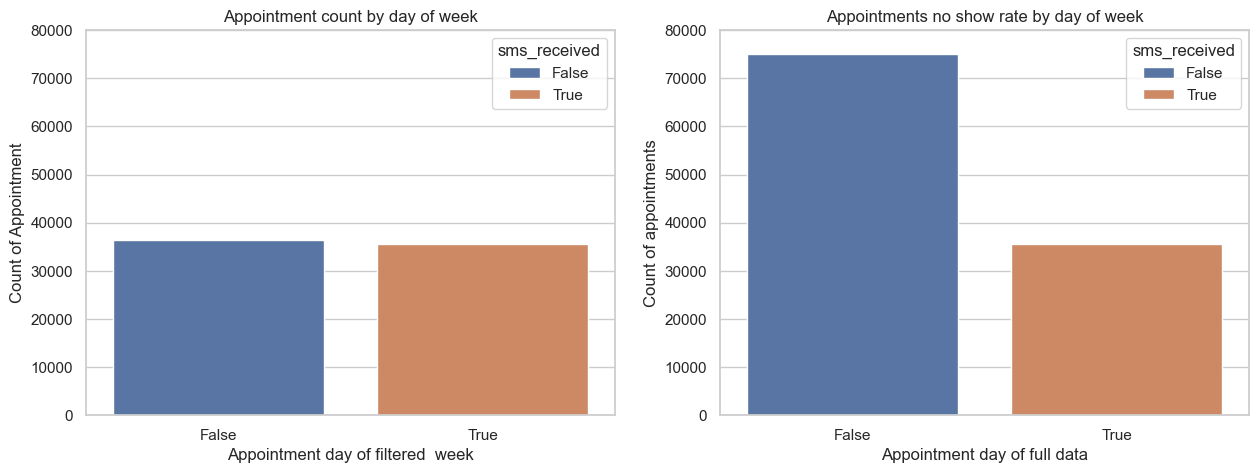

In [59]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(data=df_0, x = df_0['sms_received'], hue=df_0['sms_received'], palette='deep')
plt.xlabel('Appointment day of filtered  week')
plt.ylabel('Count of Appointment')
plt.ylim(0,80000)
plt.title('Appointment count by day of week')

plt.subplot(1,2,2)
sns.countplot(data=temp_df, x=temp_df['sms_received'], hue=temp_df['sms_received'], palette='deep')
plt.xlabel('Appointment day of full data')
plt.ylabel('Count of appointments')
plt.ylim(0,80000)
plt.title('Appointments no show rate by day of week')

plt.show()


In [60]:
sms = df_0['sms_received'].value_counts()
sms

sms_received
False    36477
True     35482
Name: count, dtype: int64

This marks arround 51% of appointments with received SMS this is much a larger share than on the full data set.

In [61]:
SMS_proportion = df_0['sms_received'].sum() / len(df_0.index)
SMS_proportion

0.4930863408329743

When filtered out data with day difference between scheduling and appointment of 0. These filtered out appointments did not receive and SMS. It makes sense that patients do not get an SMS for appointments on the same day. The filtered data therefore has much comparable group size for appointments with and without an SMS reminder.

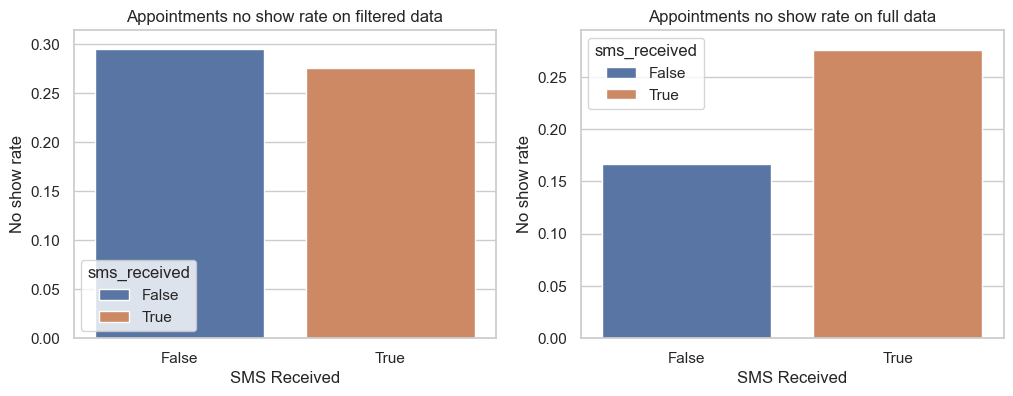

In [62]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x=df_0['sms_received'], y=df_0['no_show'], err_kws={'linewidth': 0}, hue=df_0['sms_received'], palette='deep')
plt.xlabel('SMS Received')
plt.ylabel('No show rate')
plt.title('Appointments no show rate on filtered data')

plt.subplot(1,2,2)
sns.barplot(x=temp_df['sms_received'], y=temp_df['no_show'], err_kws={'linewidth': 0}, hue=temp_df['sms_received'], palette='deep')
plt.xlabel('SMS Received')
plt.ylabel('No show rate')
plt.title('Appointments no show rate on full data')

plt.show()


No show rate for appointments with SMS received

In [63]:
noshow_share_SMS = len(df_0.query('no_show == True and sms_received == True')) / len(df_0.query('sms_received == True'))
noshow_share_SMS

0.27574544839637

No show rate for appointments with out SMS received

In [64]:
show_share_SMS = len(df_0.query('no_show == True and sms_received == False')) / len(df_0.query('sms_received == False'))
show_share_SMS

0.2943772788332374

In [65]:
df_0['patient_id'] = df_0['patient_id'].astype('int64')

In [66]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71959 entries, 5 to 110526
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   patient_id               71959 non-null  int64         
 1   appointment_id           71959 non-null  int64         
 2   gender                   71959 non-null  category      
 3   scheduled_day            71959 non-null  datetime64[ns]
 4   appointment_day          71959 non-null  datetime64[ns]
 5   age                      71959 non-null  int64         
 6   neighbourhood            71959 non-null  category      
 7   scholarship              71959 non-null  int64         
 8   hypertension             71959 non-null  int64         
 9   diabetes                 71959 non-null  int64         
 10  alcoholism               71959 non-null  int64         
 11  handicap                 71959 non-null  int64         
 12  sms_received             71959 non-n

In [67]:
df_0.to_csv("C:/Research/Msc/CMM709/CAUSALITY-EXPLORE/data/processed/medical_appointment_no_show_processed.csv", index=False)